#Kaohom Jewelry Business Analysis

##Table of Contents



1.   Introduction
2.   Data Preparation (Load and Clean)
3.   Data Modeling (Merge and Structure)
4.   Insight Table and Viz(Per Level)
5.   Conclusion



##Introduction


*   Project Purpose:Kaohom Jewelry is a mock business dataset I created for a learning project, simulating operations from January 2022 to December 2024. The business specializes in jewelry accessories, including silver, pearl, gold, and diamond pieces. The dataset is designed to reflect real-world complexity, covering multiple levels of analysis: transactional, customer, marketing performance, manpower, funnel performance, business efficiency and business outcomes.

#Data Preparation (Load and Clean)

##Data Loading

Load and examine the initial structure of the datasets required for this analysis.

In [148]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# convert .CSV to dataframe
customers_df = pd.read_csv('customers.csv')
transactions_df = pd.read_csv('transactions.csv')
products_df = pd.read_csv('products.csv')
marketing_spend_df = pd.read_csv('marketing_spend.csv')
team_cost_df = pd.read_csv('team_cost.csv')
influencers_df = pd.read_csv('influencers.csv')
email_funnel_df = pd.read_csv('email_funnel.csv')


In [149]:
customers_df

customer_id first_name   last_name  age  gender nationality  \
0      CUST-F68A2   Kathleen    Sandoval   54  Female    American   
1      CUST-A723B   Jennifer      Parker   32    Male         Lao   
2      CUST-E572B      Brian      Bishop   37    Male         Lao   
3      CUST-3CE22      Sarah     Pearson   55  Female        Thai   
4      CUST-05E12  Alejandro      Chavez   64  Female         Lao   
...           ...        ...         ...  ...     ...         ...   
15283  CUST-73939       Juan        Lutz   61  Female       Other   
15284  CUST-2751E  Katherine     Webster   27    Male        Thai   
15285  CUST-85474    Stephen  Villanueva   34    Male         Lao   
15286  CUST-9725D     Steven      Harvey   24    Male        Thai   
15287  CUST-CA489    Tiffany       Craig   21    Male         Lao   

        purchase_channel payment_methods signup_date customer_first_touch  \
0         Vangvieng-Shop  Mobile Banking  2022-01-01              Walk-in   
1         Vangvieng-Shop  Mobile Banking  2022-01-01              Walk-in   
2      Luangprabang-Shop     Credit Card  2022-01-01              Walk-in   
3         Vangvieng-Shop     Credit Card  2022-01-01              Walk-in   
4         Vientiane-Shop     Credit Card  2022-01-01              Walk-in   
...                  ...             ...         ...                  ...   
15283     Vientiane-Shop     Credit Card  2024-12-30              Walk-in   
15284     Online/Website  Mobile Banking  2024-12-30             Facebook   
15285   Savanhnaket-Shop     Credit Card  2024-12-30              Walk-in   
15286  Luangprabang-Shop  Mobile Banking  2024-12-30              Walk-in   
15287  Luangprabang-Shop  Mobile Banking  2024-12-30              Walk-in   

       is_member  
0           True  
1           True  
2          False  
3          False  
4           True  
...          ...  
15283      False  
15284       True  
15285       True  
15286       True  
15287      False  

[15288 rows x 11 columns]

In [150]:
transactions_df

transaction_id customer_id  product_id  quantity  price purchase_date  \
0           TX-213EC  CUST-E572B  PROD-90DEA         2    175    2022-01-01   
1           TX-EE2E1  CUST-43454  PROD-28A96         1     87    2022-01-01   
2           TX-EE2E1  CUST-43454  PROD-70A5B         2    844    2022-01-01   
3           TX-EE2E1  CUST-43454  PROD-14713         1    559    2022-01-01   
4           TX-CBF1E  CUST-05E12  PROD-9F02D         1     96    2022-01-01   
...              ...         ...         ...       ...    ...           ...   
69408       TX-FE88F  CUST-87639  PROD-FE171         1     72    2024-12-31   
69409       TX-BD82C  CUST-46372  PROD-08B07         2    184    2024-12-31   
69410       TX-BD82C  CUST-46372  PROD-2FB46         1     16    2024-12-31   
69411       TX-D0592  CUST-49F78  PROD-83358         2     91    2024-12-31   
69412       TX-01E82  CUST-85A30  PROD-3C466         1     60    2024-12-31   

       payment_method   purchase_channel  is_member  total  
0         Credit Card  Luangprabang-Shop      False    350  
1      Mobile Banking     Vangvieng-Shop      False     87  
2      Mobile Banking     Vangvieng-Shop      False   1688  
3      Mobile Banking     Vangvieng-Shop      False    559  
4         Credit Card     Vientiane-Shop       True     96  
...               ...                ...        ...    ...  
69408     Credit Card     Online/Website      False     72  
69409  Mobile Banking   Savanhnaket-Shop      False    368  
69410  Mobile Banking   Savanhnaket-Shop      False     16  
69411  Mobile Banking     Online/Website      False    182  
69412     Credit Card     Online/Website      False     60  

[69413 rows x 10 columns]

In [151]:
products_df

product_id                           name  category         material  \
0    PROD-E7503          Kaohom Pearl Necklace  Necklace            Pearl   
1    PROD-96A55             Kaohom Silver Ring      Ring           Silver   
2    PROD-0F339         Kaohom Silver Necklace  Necklace           Silver   
3    PROD-56483  Kaohom Natural Diamond Anklet    Anklet  Natural Diamond   
4    PROD-E4DE5           Kaohom Silver Anklet    Anklet           Silver   
..          ...                            ...       ...              ...   
295  PROD-2BF5A          Kaohom Pearl Bracelet  Bracelet            Pearl   
296  PROD-AC9C5              Kaohom Pearl Ring      Ring            Pearl   
297  PROD-4BDEE         Kaohom Silver Bracelet  Bracelet           Silver   
298  PROD-DE80D         Kaohom Silver Necklace  Necklace           Silver   
299  PROD-3D740             Kaohom Silver Ring      Ring           Silver   

     price  
0      101  
1       31  
2       54  
3     5811  
4       29  
..     ...  
295    220  
296    148  
297     98  
298     77  
299     62  

[300 rows x 5 columns]

In [152]:
marketing_spend_df

month     channel  spend influencer_id
0    2022-01-01    Facebook   2825           NaN
1    2022-01-01  Influencer   1620    INFL-B0C1A
2    2022-01-01   Instagram   2439           NaN
3    2022-01-01      Tiktok   3916           NaN
4    2022-02-01    Facebook   1750           NaN
..          ...         ...    ...           ...
108  2024-11-01  Influencer   2028    INFL-2DF43
109  2024-11-01   Instagram   1397           NaN
110  2024-12-01    Facebook   3505           NaN
111  2024-12-01  Influencer   1737    INFL-C3D54
112  2024-12-01   Instagram   4947           NaN

[113 rows x 4 columns]

In [153]:
team_cost_df

role    cost  acquisition_time  acquisition_cost
0            Marketer x2  2400.0               0.7            1680.0
1    Stakeholder Manager  2000.0               0.6            1200.0
2                     HR  1200.0               0.2             240.0
3        Data Analyst x2  2400.0               0.5            1200.0
4      Financial Analyst  2200.0               0.5            1100.0
5    Business Strategist  3000.0               0.6            1800.0
6            Sale Rep x5  4000.0               0.4            1600.0
7        Product Manager  1750.0               0.3             525.0
8       Store Manager x5  5000.0               0.3            1500.0
9       Support Staff x5  3250.0               0.1             325.0
10      Security Guardx5  3250.0               0.1             325.0
11  Outsource Cleaner x5  1250.0               0.1             125.0

In [154]:
influencers_df

influencer_id       channel_name  gender  rate_card
0     INFL-0A4AE         TaylorLand  Female       2378
1     INFL-AD505           RobertTV  Female       1059
2     INFL-3E05E     PatriciaStudio    Male        974
3     INFL-A01B3        CarmenSport  Female       1024
4     INFL-6FFDE    JenniferPodcast  Female       1020
5     INFL-60FCA        GaryJewelry    Male       2413
6     INFL-D4694        JaniceSport  Female       2244
7     INFL-AA259       AutumnBeauty    Male       1299
8     INFL-1BE1E       RubenPodcast    Male       1538
9     INFL-1AB8D      ShannonCardio  Female       1780
10    INFL-2DF43     JenniferGadget    Male       2028
11    INFL-C626D        ScottGadget  Female       1614
12    INFL-23E2F             AnnaTV    Male        867
13    INFL-3A0A9         EricTravel    Male       1493
14    INFL-1CFBE        MelindaTeam    Male        802
15    INFL-C3D54         RyanCardio  Female       1737
16    INFL-9A2C1           NathanTV    Male       2179
17    INFL-9508C  ChristopherBeauty  Female        969
18    INFL-4B73B       TinaUniverse  Female       2388
19    INFL-46071       BeverlySport    Male       2144
20    INFL-81096          RayStudio  Female       2087
21    INFL-47654      SarahUniverse    Male       1902
22    INFL-34065     TimothyPodcast    Male       1187
23    INFL-CCAC0   MichelleUniverse  Female       1122
24    INFL-77B42        CarolTravel    Male       2020
25    INFL-56DBF          BrianLand    Male       1118
26    INFL-BE95D     MichaelAcademy  Female        858
27    INFL-72488        EvanJewelry  Female       2359
28    INFL-F7DD9       PaulUniverse  Female       2160
29    INFL-B4158      KristinTravel  Female       1660
30    INFL-C8A00         TammySport  Female       1463
31    INFL-5256E       TristanSport    Male       1638
32    INFL-2BFD0     KathleenGadget    Male       1431
33    INFL-25D0D     NicholasGadget  Female       2437
34    INFL-98FC9           RobertTV  Female       2187
35    INFL-348AB           RyanTeam  Female       1128
36    INFL-F9800     KristinaCardio    Male        890
37    INFL-67F91       AndrewBeauty    Male       1185
38    INFL-3428C       DonaldTravel    Male       1122
39    INFL-B0C1A        RandyGadget    Male       1620
40    INFL-60CFE           DanielTV  Female       1452
41    INFL-56735       SusanPodcast  Female       1692
42    INFL-79B96     AllisonAcademy    Male       1559
43    INFL-E2131        GrantStudio  Female        808
44    INFL-BFE19        MichaelLand  Female       1962
45    INFL-5CA58         LisaTravel    Male       1433
46    INFL-DB704        HollyCardio    Male       2151
47    INFL-61CCD       BarryJewelry    Male        983
48    INFL-5499F    VirginiaAcademy  Female       2373
49    INFL-3E6D3         TroyGadget    Male        854

In [155]:
email_funnel_df

month  emails_sent  opens  clicks  add_to_carts  purchases
0    2022-01-01            8      2       0             0          0
1    2022-01-01            8      3       0             0          0
2    2022-01-01            8      3       0             0          0
3    2022-01-01            8      2       0             0          0
4    2022-02-01          214     73      19             3          0
..          ...          ...    ...     ...           ...        ...
108  2024-11-01         7266   2688     655            99         22
109  2024-11-01         7266   2512     723           175         43
110  2024-12-01         7466   2596     586           125         30
111  2024-12-01         7466   3369     471           110         25
112  2024-12-01         7466   2744     794           157         34

[113 rows x 6 columns]

##Data Cleaning

Data Cleaning is the process of preparing the data to ensure it is ready for analysis. In this step, the focus is on verifying that dataset contains no missing value or any other issues that could cause problem during future analysis.

###Handle Missing Values

1.check if there's any missing value.

In [156]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15288 entries, 0 to 15287
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customer_id           15288 non-null  object
 1   first_name            15288 non-null  object
 2   last_name             15288 non-null  object
 3   age                   15288 non-null  int64 
 4   gender                15288 non-null  object
 5   nationality           15288 non-null  object
 6   purchase_channel      15288 non-null  object
 7   payment_methods       15288 non-null  object
 8   signup_date           15288 non-null  object
 9   customer_first_touch  15288 non-null  object
 10  is_member             15288 non-null  bool  
dtypes: bool(1), int64(1), object(9)
memory usage: 1.2+ MB


Since there's no missing or any messy value here, so you can see the minimun age is 18.

In [157]:
customers_df.describe()

age
count  15288.000000
mean      41.379906
std       13.888235
min       18.000000
25%       29.000000
50%       41.000000
75%       53.000000
max       65.000000

In [158]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69413 entries, 0 to 69412
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    69413 non-null  object
 1   customer_id       69413 non-null  object
 2   product_id        69413 non-null  object
 3   quantity          69413 non-null  int64 
 4   price             69413 non-null  int64 
 5   purchase_date     69413 non-null  object
 6   payment_method    69413 non-null  object
 7   purchase_channel  69413 non-null  object
 8   is_member         69413 non-null  bool  
 9   total             69413 non-null  int64 
dtypes: bool(1), int64(3), object(6)
memory usage: 4.8+ MB


In [159]:
transactions_df.describe()

quantity         price         total
count  69413.000000  69413.000000  69413.000000
mean       1.499921    380.861280    572.744356
std        0.500004    786.396772   1264.005732
min        1.000000     15.000000     15.000000
25%        1.000000     60.000000     78.000000
50%        1.000000    105.000000    174.000000
75%        2.000000    337.000000    529.000000
max        2.000000   7434.000000  14868.000000

In [160]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  300 non-null    object
 1   name        300 non-null    object
 2   category    300 non-null    object
 3   material    300 non-null    object
 4   price       300 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.8+ KB


In [161]:
products_df.describe()

price
count   300.000000
mean    381.453333
std     786.133364
min      15.000000
25%      59.750000
50%     105.500000
75%     337.750000
max    7434.000000

In [162]:
marketing_spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   month          113 non-null    object
 1   channel        113 non-null    object
 2   spend          113 non-null    int64 
 3   influencer_id  36 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.7+ KB


In [163]:
marketing_spend_df.describe()

spend
count   113.000000
mean   2700.982301
std    1112.247716
min     858.000000
25%    1780.000000
50%    2470.000000
75%    3504.000000
max    4947.000000

In [164]:
team_cost_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   role              12 non-null     object 
 1   cost              12 non-null     float64
 2   acquisition_time  12 non-null     float64
 3   acquisition_cost  12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 516.0+ bytes


In [165]:
team_cost_df.describe()

cost  acquisition_time  acquisition_cost
count    12.000000         12.000000         12.000000
mean   2641.666667          0.366667        968.333333
std    1120.436874          0.214617        623.076434
min    1200.000000          0.100000        125.000000
25%    1937.500000          0.175000        325.000000
50%    2400.000000          0.350000       1150.000000
75%    3250.000000          0.525000       1525.000000
max    5000.000000          0.700000       1800.000000

In [166]:
influencers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   influencer_id  50 non-null     object
 1   channel_name   50 non-null     object
 2   gender         50 non-null     object
 3   rate_card      50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB


In [167]:
influencers_df.describe()

rate_card
count    50.000000
mean   1575.820000
std     527.369045
min     802.000000
25%    1119.000000
50%    1548.500000
75%    2072.250000
max    2437.000000

In [168]:
email_funnel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   month         113 non-null    object
 1   emails_sent   113 non-null    int64 
 2   opens         113 non-null    int64 
 3   clicks        113 non-null    int64 
 4   add_to_carts  113 non-null    int64 
 5   purchases     113 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.4+ KB


In [169]:
email_funnel_df.describe()

emails_sent        opens      clicks  add_to_carts   purchases
count   113.000000   113.000000  113.000000    113.000000  113.000000
mean   2739.681416  1022.840708  210.769912     41.831858    9.106195
std    2527.272080   955.691602  219.222897     45.660803   10.332303
min       0.000000     0.000000    0.000000      0.000000    0.000000
25%       0.000000     0.000000    0.000000      0.000000    0.000000
50%    2566.000000   907.000000  159.000000     31.000000    7.000000
75%    4920.000000  1779.000000  360.000000     70.000000   15.000000
max    7466.000000  3369.000000  794.000000    183.000000   45.000000

This dataset was make-up by me, so there's no missing value here. But I gonna show if in case it has missing value such as NaN in customers_df, at index 4 column age, let's see how can I fix it.

In [170]:
customers_df.loc[4, 'age'] = np.nan

In [171]:
customers_df.head()

customer_id first_name last_name   age  gender nationality  \
0  CUST-F68A2   Kathleen  Sandoval  54.0  Female    American   
1  CUST-A723B   Jennifer    Parker  32.0    Male         Lao   
2  CUST-E572B      Brian    Bishop  37.0    Male         Lao   
3  CUST-3CE22      Sarah   Pearson  55.0  Female        Thai   
4  CUST-05E12  Alejandro    Chavez   NaN  Female         Lao   

    purchase_channel payment_methods signup_date customer_first_touch  \
0     Vangvieng-Shop  Mobile Banking  2022-01-01              Walk-in   
1     Vangvieng-Shop  Mobile Banking  2022-01-01              Walk-in   
2  Luangprabang-Shop     Credit Card  2022-01-01              Walk-in   
3     Vangvieng-Shop     Credit Card  2022-01-01              Walk-in   
4     Vientiane-Shop     Credit Card  2022-01-01              Walk-in   

   is_member  
0       True  
1       True  
2      False  
3      False  
4       True

2.Replace NA

In real business, we can't just randomly replace a customer's age. But we also don't want to drop the data, so let's fill it with mode.

In [172]:
customers_df['age'].mode().iloc[0]

np.float64(47.0)

In [173]:
mode_age = customers_df['age'].mode().iloc[0]

This customer's real age is 64, but we set it to NaN. We'll fill missing values using the mode, which is 47.

In [174]:
customers_df = customers_df.fillna(mode_age)
customers_df['age'] = customers_df['age'].astype('Int64')

In [175]:
customers_df.head()

customer_id first_name last_name  age  gender nationality  \
0  CUST-F68A2   Kathleen  Sandoval   54  Female    American   
1  CUST-A723B   Jennifer    Parker   32    Male         Lao   
2  CUST-E572B      Brian    Bishop   37    Male         Lao   
3  CUST-3CE22      Sarah   Pearson   55  Female        Thai   
4  CUST-05E12  Alejandro    Chavez   47  Female         Lao   

    purchase_channel payment_methods signup_date customer_first_touch  \
0     Vangvieng-Shop  Mobile Banking  2022-01-01              Walk-in   
1     Vangvieng-Shop  Mobile Banking  2022-01-01              Walk-in   
2  Luangprabang-Shop     Credit Card  2022-01-01              Walk-in   
3     Vangvieng-Shop     Credit Card  2022-01-01              Walk-in   
4     Vientiane-Shop     Credit Card  2022-01-01              Walk-in   

   is_member  
0       True  
1       True  
2      False  
3      False  
4       True

3. Unique Value Check: Examine unique value in specific columns (purchase_channel, payment_method, nationality) to detect anomalies.

In [176]:
customers_df['purchase_channel'].unique()

array(['Vangvieng-Shop', 'Luangprabang-Shop', 'Vientiane-Shop',
       'Online/Website', 'Pakse-Shop', 'Savanhnaket-Shop'], dtype=object)

In [177]:
customers_df['nationality'].unique()

array(['American', 'Lao', 'Thai', 'Other', 'Chinese'], dtype=object)

In [178]:
customers_df['payment_methods'].unique()

array(['Mobile Banking', 'Credit Card', 'Cash'], dtype=object)

In [179]:
transactions_df['is_member'].unique()

array([False,  True])

In [180]:
products_df['material'].unique()

array(['Pearl', 'Silver', 'Natural Diamond', 'Gold', 'Lab-Grown Diamond'],
      dtype=object)

In [181]:
marketing_spend_df['channel'].unique()

array(['Facebook', 'Influencer', 'Instagram', 'Tiktok'], dtype=object)

In [182]:
team_cost_df['role'].unique()

array(['Marketer x2', 'Stakeholder Manager', 'HR', 'Data Analyst x2',
       'Financial Analyst', 'Business Strategist', 'Sale Rep x5',
       'Product Manager', 'Store Manager x5', 'Support Staff x5',
       'Security Guardx5', 'Outsource Cleaner x5'], dtype=object)

In [183]:
influencers_df['gender'].unique()

array(['Female', 'Male'], dtype=object)

#Data Modeling (Merge and Structure)

build analytical dataframe or make Goal-Specific table for each level. (using join, groupby, fillter, agg, etc.)


##Customer Level

use dataframe on customer level: **customers_df** , **transactions_df** , **products_df** and merge them into single source.

In [184]:
# join dataframes
customers_activities_df = transactions_df.merge(customers_df, on='customer_id', how='left')
customers_activities_df.head(10)


transaction_id customer_id  product_id  quantity  price purchase_date  \
0       TX-213EC  CUST-E572B  PROD-90DEA         2    175    2022-01-01   
1       TX-EE2E1  CUST-43454  PROD-28A96         1     87    2022-01-01   
2       TX-EE2E1  CUST-43454  PROD-70A5B         2    844    2022-01-01   
3       TX-EE2E1  CUST-43454  PROD-14713         1    559    2022-01-01   
4       TX-CBF1E  CUST-05E12  PROD-9F02D         1     96    2022-01-01   
5       TX-E59AE  CUST-3CE22  PROD-F6B4B         1     41    2022-01-01   
6       TX-213EC  CUST-E572B  PROD-08B07         1    184    2022-01-01   
7       TX-CBF1E  CUST-05E12  PROD-8B71C         1    189    2022-01-01   
8       TX-CBF1E  CUST-05E12  PROD-9EA68         1     22    2022-01-01   
9       TX-E59AE  CUST-3CE22  PROD-F53D3         2   1166    2022-01-01   

   payment_method purchase_channel_x  is_member_x  total first_name last_name  \
0     Credit Card  Luangprabang-Shop        False    350      Brian    Bishop   
1  Mobile Banking     Vangvieng-Shop        False     87      Roger      Moss   
2  Mobile Banking     Vangvieng-Shop        False   1688      Roger      Moss   
3  Mobile Banking     Vangvieng-Shop        False    559      Roger      Moss   
4     Credit Card     Vientiane-Shop         True     96  Alejandro    Chavez   
5     Credit Card     Vangvieng-Shop        False     41      Sarah   Pearson   
6     Credit Card  Luangprabang-Shop        False    184      Brian    Bishop   
7     Credit Card     Vientiane-Shop         True    189  Alejandro    Chavez   
8     Credit Card     Vientiane-Shop         True     22  Alejandro    Chavez   
9     Credit Card     Vangvieng-Shop        False   2332      Sarah   Pearson   

   age  gender nationality purchase_channel_y payment_methods signup_date  \
0   37    Male         Lao  Luangprabang-Shop     Credit Card  2022-01-01   
1   18  Female         Lao     Vangvieng-Shop  Mobile Banking  2022-01-01   
2   18  Female         Lao     Vangvieng-Shop  Mobile Banking  2022-01-01   
3   18  Female         Lao     Vangvieng-Shop  Mobile Banking  2022-01-01   
4   47  Female         Lao     Vientiane-Shop     Credit Card  2022-01-01   
5   55  Female        Thai     Vangvieng-Shop     Credit Card  2022-01-01   
6   37    Male         Lao  Luangprabang-Shop     Credit Card  2022-01-01   
7   47  Female         Lao     Vientiane-Shop     Credit Card  2022-01-01   
8   47  Female         Lao     Vientiane-Shop     Credit Card  2022-01-01   
9   55  Female        Thai     Vangvieng-Shop     Credit Card  2022-01-01   

  customer_first_touch  is_member_y  
0              Walk-in        False  
1              Walk-in        False  
2              Walk-in        False  
3              Walk-in        False  
4              Walk-in         True  
5              Walk-in        False  
6              Walk-in        False  
7              Walk-in         True  
8              Walk-in         True  
9              Walk-in        False

###rename column

dropping duplicated column and rename will make df cleaner

In [185]:
customers_activities_df = customers_activities_df.drop(['purchase_channel_y', 'payment_methods', 'is_member_y'], axis= 1)

In [186]:
customers_activities_df.columns.values[7] = 'branch'
customers_activities_df.columns.values[8] = 'is_member'
customers_activities_df

transaction_id customer_id  product_id  quantity  price purchase_date  \
0           TX-213EC  CUST-E572B  PROD-90DEA         2    175    2022-01-01   
1           TX-EE2E1  CUST-43454  PROD-28A96         1     87    2022-01-01   
2           TX-EE2E1  CUST-43454  PROD-70A5B         2    844    2022-01-01   
3           TX-EE2E1  CUST-43454  PROD-14713         1    559    2022-01-01   
4           TX-CBF1E  CUST-05E12  PROD-9F02D         1     96    2022-01-01   
...              ...         ...         ...       ...    ...           ...   
70248       TX-FE88F  CUST-87639  PROD-FE171         1     72    2024-12-31   
70249       TX-BD82C  CUST-46372  PROD-08B07         2    184    2024-12-31   
70250       TX-BD82C  CUST-46372  PROD-2FB46         1     16    2024-12-31   
70251       TX-D0592  CUST-49F78  PROD-83358         2     91    2024-12-31   
70252       TX-01E82  CUST-85A30  PROD-3C466         1     60    2024-12-31   

       payment_method             branch  is_member  total first_name  \
0         Credit Card  Luangprabang-Shop      False    350      Brian   
1      Mobile Banking     Vangvieng-Shop      False     87      Roger   
2      Mobile Banking     Vangvieng-Shop      False   1688      Roger   
3      Mobile Banking     Vangvieng-Shop      False    559      Roger   
4         Credit Card     Vientiane-Shop       True     96  Alejandro   
...               ...                ...        ...    ...        ...   
70248     Credit Card     Online/Website      False     72    Melissa   
70249  Mobile Banking   Savanhnaket-Shop      False    368     Darren   
70250  Mobile Banking   Savanhnaket-Shop      False     16     Darren   
70251  Mobile Banking     Online/Website      False    182     Sherri   
70252     Credit Card     Online/Website      False     60      David   

      last_name  age  gender nationality signup_date customer_first_touch  
0        Bishop   37    Male         Lao  2022-01-01              Walk-in  
1          Moss   18  Female         Lao  2022-01-01              Walk-in  
2          Moss   18  Female         Lao  2022-01-01              Walk-in  
3          Moss   18  Female         Lao  2022-01-01              Walk-in  
4        Chavez   47  Female         Lao  2022-01-01              Walk-in  
...         ...  ...     ...         ...         ...                  ...  
70248  Sullivan   47    Male         Lao  2024-08-31               Tiktok  
70249   Jimenez   64    Male         Lao  2024-08-05              Walk-in  
70250   Jimenez   64    Male         Lao  2024-08-05              Walk-in  
70251    Dodson   40  Female     Chinese  2024-11-03       Influencer_Ref  
70252   Chapman   47  Female         Lao  2024-11-11       Influencer_Ref  

[70253 rows x 17 columns]

ccontinue to merge **customers_activities_df** with **products_df** to get **customer_transaction_df**

In [187]:
## Join df and repeat the rename/drop duplicate columns process
customer_transaction_df = customers_activities_df.merge(products_df, on='product_id', how='left')

## Drop dup
customer_transaction_df = customer_transaction_df.drop('price_y', axis= 1)

# rename columns
customer_transaction_df.columns.values[4] = 'price'
customer_transaction_df.columns.values[17] = 'product_name'

# correct datatype
customer_transaction_df['purchase_date'] = pd.to_datetime(customer_transaction_df['purchase_date'])
customer_transaction_df['signup_date'] = pd.to_datetime(customer_transaction_df['signup_date'])
customer_transaction_df['signup_month'] = customer_transaction_df['signup_date'].dt.to_period('M').astype(str)
customer_transaction_df['purchase_month'] = customer_transaction_df['purchase_date'].dt.to_period('M').astype(str)
customer_transaction_df

transaction_id customer_id  product_id  quantity  price purchase_date  \
0           TX-213EC  CUST-E572B  PROD-90DEA         2    175    2022-01-01   
1           TX-EE2E1  CUST-43454  PROD-28A96         1     87    2022-01-01   
2           TX-EE2E1  CUST-43454  PROD-70A5B         2    844    2022-01-01   
3           TX-EE2E1  CUST-43454  PROD-14713         1    559    2022-01-01   
4           TX-CBF1E  CUST-05E12  PROD-9F02D         1     96    2022-01-01   
...              ...         ...         ...       ...    ...           ...   
70248       TX-FE88F  CUST-87639  PROD-FE171         1     72    2024-12-31   
70249       TX-BD82C  CUST-46372  PROD-08B07         2    184    2024-12-31   
70250       TX-BD82C  CUST-46372  PROD-2FB46         1     16    2024-12-31   
70251       TX-D0592  CUST-49F78  PROD-83358         2     91    2024-12-31   
70252       TX-01E82  CUST-85A30  PROD-3C466         1     60    2024-12-31   

       payment_method             branch  is_member  total  ... age  gender  \
0         Credit Card  Luangprabang-Shop      False    350  ...  37    Male   
1      Mobile Banking     Vangvieng-Shop      False     87  ...  18  Female   
2      Mobile Banking     Vangvieng-Shop      False   1688  ...  18  Female   
3      Mobile Banking     Vangvieng-Shop      False    559  ...  18  Female   
4         Credit Card     Vientiane-Shop       True     96  ...  47  Female   
...               ...                ...        ...    ...  ...  ..     ...   
70248     Credit Card     Online/Website      False     72  ...  47    Male   
70249  Mobile Banking   Savanhnaket-Shop      False    368  ...  64    Male   
70250  Mobile Banking   Savanhnaket-Shop      False     16  ...  64    Male   
70251  Mobile Banking     Online/Website      False    182  ...  40  Female   
70252     Credit Card     Online/Website      False     60  ...  47  Female   

       nationality signup_date customer_first_touch            product_name  \
0              Lao  2022-01-01              Walk-in   Kaohom Pearl Necklace   
1              Lao  2022-01-01              Walk-in     Kaohom Pearl Anklet   
2              Lao  2022-01-01              Walk-in     Kaohom Gold Earring   
3              Lao  2022-01-01              Walk-in    Kaohom Gold Necklace   
4              Lao  2022-01-01              Walk-in   Kaohom Silver Earring   
...            ...         ...                  ...                     ...   
70248          Lao  2024-08-31               Tiktok  Kaohom Silver Necklace   
70249          Lao  2024-08-05              Walk-in     Kaohom Pearl Anklet   
70250          Lao  2024-08-05              Walk-in   Kaohom Silver Earring   
70251      Chinese  2024-11-03       Influencer_Ref  Kaohom Silver Bracelet   
70252          Lao  2024-11-11       Influencer_Ref  Kaohom Silver Bracelet   

       category material signup_month purchase_month  
0      Necklace    Pearl      2022-01        2022-01  
1        Anklet    Pearl      2022-01        2022-01  
2       Earring     Gold      2022-01        2022-01  
3      Necklace     Gold      2022-01        2022-01  
4       Earring   Silver      2022-01        2022-01  
...         ...      ...          ...            ...  
70248  Necklace   Silver      2024-08        2024-12  
70249    Anklet    Pearl      2024-08        2024-12  
70250   Earring   Silver      2024-08        2024-12  
70251  Bracelet   Silver      2024-11        2024-12  
70252  Bracelet   Silver      2024-11        2024-12  

[70253 rows x 22 columns]

 **Write to csv file** make data reusable.

In [188]:
customer_transaction_df.to_csv('customer_transaction.csv')

###Customer Understanding

##Operation Level

use data like : **marketing_spend_df** , **team_cost_df** , **influencers_df** to examine overall operating cost.

###Monthly fixed cost

In [189]:
# make team_cost into monthly fixed cost
months = pd.date_range(start='2022-01-01', end='2024-12-31', freq='MS')
monthly_team_cost = pd.DataFrame()
monthly_team_cost['month'] = months
monthly_team_cost['total_salary'] = team_cost_df['cost'].sum()
monthly_team_cost['acq_team_cost'] = team_cost_df['acquisition_cost'].sum()
monthly_team_cost['retention_team_cost'] = monthly_team_cost['total_salary'] - monthly_team_cost['acq_team_cost']
monthly_team_cost['month'] = pd.to_datetime(monthly_team_cost['month'])
monthly_team_cost['month'] = monthly_team_cost['month'].dt.to_period('M').astype(str)
monthly_team_cost

month  total_salary  acq_team_cost  retention_team_cost
0   2022-01       31700.0        11620.0              20080.0
1   2022-02       31700.0        11620.0              20080.0
2   2022-03       31700.0        11620.0              20080.0
3   2022-04       31700.0        11620.0              20080.0
4   2022-05       31700.0        11620.0              20080.0
5   2022-06       31700.0        11620.0              20080.0
6   2022-07       31700.0        11620.0              20080.0
7   2022-08       31700.0        11620.0              20080.0
8   2022-09       31700.0        11620.0              20080.0
9   2022-10       31700.0        11620.0              20080.0
10  2022-11       31700.0        11620.0              20080.0
11  2022-12       31700.0        11620.0              20080.0
12  2023-01       31700.0        11620.0              20080.0
13  2023-02       31700.0        11620.0              20080.0
14  2023-03       31700.0        11620.0              20080.0
15  2023-04       31700.0        11620.0              20080.0
16  2023-05       31700.0        11620.0              20080.0
17  2023-06       31700.0        11620.0              20080.0
18  2023-07       31700.0        11620.0              20080.0
19  2023-08       31700.0        11620.0              20080.0
20  2023-09       31700.0        11620.0              20080.0
21  2023-10       31700.0        11620.0              20080.0
22  2023-11       31700.0        11620.0              20080.0
23  2023-12       31700.0        11620.0              20080.0
24  2024-01       31700.0        11620.0              20080.0
25  2024-02       31700.0        11620.0              20080.0
26  2024-03       31700.0        11620.0              20080.0
27  2024-04       31700.0        11620.0              20080.0
28  2024-05       31700.0        11620.0              20080.0
29  2024-06       31700.0        11620.0              20080.0
30  2024-07       31700.0        11620.0              20080.0
31  2024-08       31700.0        11620.0              20080.0
32  2024-09       31700.0        11620.0              20080.0
33  2024-10       31700.0        11620.0              20080.0
34  2024-11       31700.0        11620.0              20080.0
35  2024-12       31700.0        11620.0              20080.0

###Monthly marketing spend

In [190]:
marketing_spend_df['month'] = pd.to_datetime(marketing_spend_df['month'])
marketing_spend_df['month'] = marketing_spend_df['month'].dt.to_period('M').astype(str)
marketing_spend_df

month     channel  spend influencer_id
0    2022-01    Facebook   2825           NaN
1    2022-01  Influencer   1620    INFL-B0C1A
2    2022-01   Instagram   2439           NaN
3    2022-01      Tiktok   3916           NaN
4    2022-02    Facebook   1750           NaN
..       ...         ...    ...           ...
108  2024-11  Influencer   2028    INFL-2DF43
109  2024-11   Instagram   1397           NaN
110  2024-12    Facebook   3505           NaN
111  2024-12  Influencer   1737    INFL-C3D54
112  2024-12   Instagram   4947           NaN

[113 rows x 4 columns]

In [191]:
channel_spend = marketing_spend_df.groupby('channel')['spend'].sum().reset_index()
channel_spend

channel   spend
0    Facebook  114638
1  Influencer   60312
2   Instagram   73397
3      Tiktok   56864

In [192]:
#make monthly_marketing_spend
monthly_marketing_spend = marketing_spend_df.groupby('month')['spend'].sum().reset_index()
monthly_marketing_spend['month'] = pd.to_datetime(monthly_marketing_spend['month'])
monthly_marketing_spend['month'] = monthly_marketing_spend['month'].dt.to_period('M').astype(str)
monthly_marketing_spend.head()

month  spend
0  2022-01  10800
1  2022-02   7809
2  2022-03   5629
3  2022-04  12560
4  2022-05   9313

In [193]:
print("✅ Hello Colab")


✅ Hello Colab


###Monthly revenue

In [194]:
# Aggregate monthly metrics grouped by purchase month
monthly_revenue = customer_transaction_df.groupby(customer_transaction_df['purchase_date'].dt.to_period('M').rename('month')).agg(
    total_sales=('total', 'sum'),
    avg_sales=('total', 'mean'),
    total_orders=('transaction_id', 'count')
).round(2)
monthly_revenue

total_sales  avg_sales  total_orders
month                                        
2022-01       499571     613.72           814
2022-02       517362     504.25          1026
2022-03       733699     557.52          1316
2022-04       874805     563.30          1553
2022-05       995850     547.17          1820
2022-06      1049769     567.44          1850
2022-07      1115161     588.79          1894
2022-08      1094535     591.32          1851
2022-09      1054239     540.64          1950
2022-10      1106618     570.72          1939
2022-11       989369     505.55          1957
2022-12      1209765     593.60          2038
2023-01      1075907     576.89          1865
2023-02       998836     550.02          1816
2023-03      1049383     514.66          2039
2023-04      1140376     587.22          1942
2023-05      1264723     604.26          2093
2023-06      1096956     575.53          1906
2023-07      1184898     592.15          2001
2023-08      1125902     570.65          1973
2023-09      1077008     557.17          1933
2023-10      1186909     595.84          1992
2023-11      1181109     601.38          1964
2023-12      1106404     574.76          1925
2024-01      1275848     605.24          2108
2024-02      1135100     586.61          1935
2024-03      1217908     620.43          1963
2024-04      1130717     576.90          1960
2024-05      1055771     550.74          1917
2024-06      1064391     562.28          1893
2024-07      1032987     543.96          1899
2024-08      1048352     570.69          1837
2024-09      1062644     554.33          1917
2024-10      1213082     599.05          2025
2024-11      1121740     599.54          1871
2024-12      3153106     576.33          5471

###Monthly COGS (Cost of Goods Sold)

In [195]:
monthly_cogs = pd.DataFrame(monthly_revenue['total_sales'] / 2)
monthly_cogs = monthly_cogs['total_sales'].rename('product_cost')

monthly_cogs = monthly_cogs.reset_index()
monthly_cogs['month'] = monthly_cogs['month'].astype(str)
monthly_cogs.head()

month  product_cost
0  2022-01      249785.5
1  2022-02      258681.0
2  2022-03      366849.5
3  2022-04      437402.5
4  2022-05      497925.0

###make total spend (monthly)

merge **monthly_marketing_spend** with **monthly_team_cost** to get total spend(monthly)

In [196]:
#make total_spend
total_spend = monthly_team_cost.merge(monthly_marketing_spend, on='month', how='left')
#merge with COGS
total_spend = total_spend.merge(monthly_cogs, on='month', how='left')
#sum spend
total_spend['total_spend'] = total_spend['total_salary'] + total_spend['spend'] + total_spend['product_cost']
total_spend.columns.values[4] = 'marketing_spend'
total_spend

month  total_salary  acq_team_cost  retention_team_cost  \
0   2022-01       31700.0        11620.0              20080.0   
1   2022-02       31700.0        11620.0              20080.0   
2   2022-03       31700.0        11620.0              20080.0   
3   2022-04       31700.0        11620.0              20080.0   
4   2022-05       31700.0        11620.0              20080.0   
5   2022-06       31700.0        11620.0              20080.0   
6   2022-07       31700.0        11620.0              20080.0   
7   2022-08       31700.0        11620.0              20080.0   
8   2022-09       31700.0        11620.0              20080.0   
9   2022-10       31700.0        11620.0              20080.0   
10  2022-11       31700.0        11620.0              20080.0   
11  2022-12       31700.0        11620.0              20080.0   
12  2023-01       31700.0        11620.0              20080.0   
13  2023-02       31700.0        11620.0              20080.0   
14  2023-03       31700.0        11620.0              20080.0   
15  2023-04       31700.0        11620.0              20080.0   
16  2023-05       31700.0        11620.0              20080.0   
17  2023-06       31700.0        11620.0              20080.0   
18  2023-07       31700.0        11620.0              20080.0   
19  2023-08       31700.0        11620.0              20080.0   
20  2023-09       31700.0        11620.0              20080.0   
21  2023-10       31700.0        11620.0              20080.0   
22  2023-11       31700.0        11620.0              20080.0   
23  2023-12       31700.0        11620.0              20080.0   
24  2024-01       31700.0        11620.0              20080.0   
25  2024-02       31700.0        11620.0              20080.0   
26  2024-03       31700.0        11620.0              20080.0   
27  2024-04       31700.0        11620.0              20080.0   
28  2024-05       31700.0        11620.0              20080.0   
29  2024-06       31700.0        11620.0              20080.0   
30  2024-07       31700.0        11620.0              20080.0   
31  2024-08       31700.0        11620.0              20080.0   
32  2024-09       31700.0        11620.0              20080.0   
33  2024-10       31700.0        11620.0              20080.0   
34  2024-11       31700.0        11620.0              20080.0   
35  2024-12       31700.0        11620.0              20080.0   

    marketing_spend  product_cost  total_spend  
0             10800      249785.5     292285.5  
1              7809      258681.0     298190.0  
2              5629      366849.5     404178.5  
3             12560      437402.5     481662.5  
4              9313      497925.0     538938.0  
5              2449      524884.5     559033.5  
6              6748      557580.5     596028.5  
7              9234      547267.5     588201.5  
8              5206      527119.5     564025.5  
9              8781      553309.0     593790.0  
10             3461      494684.5     529845.5  
11             7398      604882.5     643980.5  
12            11385      537953.5     581038.5  
13             7535      499418.0     538653.0  
14            13859      524691.5     570250.5  
15             9786      570188.0     611674.0  
16             8678      632361.5     672739.5  
17             6578      548478.0     586756.0  
18             9388      592449.0     633537.0  
19             8638      562951.0     603289.0  
20             7437      538504.0     577641.0  
21             5871      593454.5     631025.5  
22            13699      590554.5     635953.5  
23            13406      553202.0     598308.0  
24            11397      637924.0     681021.0  
25             8474      567550.0     607724.0  
26             9262      608954.0     649916.0  
27            13184      565358.5     610242.5  
28             6077      527885.5     565662.5  
29             9381      532195.5     573276.5  
30             6643      516493.5     554836.5  
31             7976      524176.

**Write to csv**

In [197]:
total_spend.to_csv('total_spend.csv')

#Insight Table & Viz (Per Level)

##Customer Understanding

Customer-level insights provide a foundational understanding of the overall business economics, including lifetime value (CLV), retention patterns, and behavioral segmentation. These insights inform decision-making for CRM and retention strategies, enabling more precise budget allocation toward high-CLV segments and channels, ultimately driving long-term profitability.

FYI : I'm not planning to do RFM or any customer segmentation at this stage, as this is just a learning project and I prefer to avoid that level of complexity for now.

###Customers Shape

**Branches**

In [198]:
customers_shape_channel = customers_df.groupby('purchase_channel')['customer_id'].count().reset_index().rename(columns=({'customer_id': 'count', 'purchase_channel': 'branch'}))
customers_shape_channel['share_pct'] = customers_shape_channel['count'] / customers_shape_channel['count'].sum() * 100
customers_shape_channel.sort_values('count', ascending=False).reset_index(drop=True).round(2)

branch  count  share_pct
0     Online/Website   3598      23.53
1  Luangprabang-Shop   3317      21.70
2     Vientiane-Shop   3105      20.31
3   Savanhnaket-Shop   1866      12.21
4         Pakse-Shop   1759      11.51
5     Vangvieng-Shop   1643      10.75

C:\Users\Somsa\AppData\Local\Temp\ipykernel_5932\1175629873.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= customers_shape_channel, x='count', y='branch', palette='Set2')


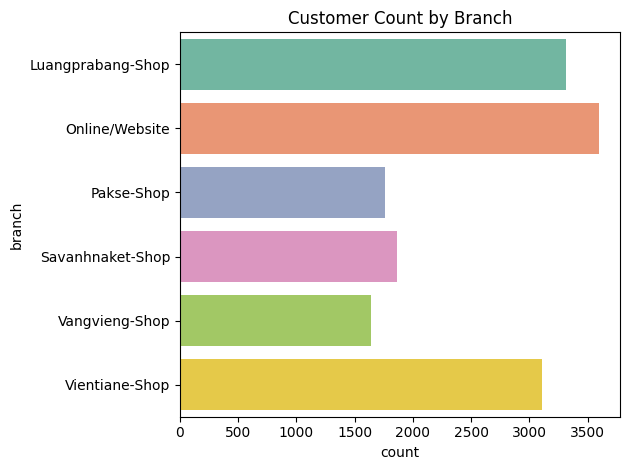

In [199]:
sns.barplot(data= customers_shape_channel, x='count', y='branch', palette='Set2')
plt.title('Customer Count by Branch')
plt.tight_layout()
plt.savefig("Customer_Count_by_Branch.png", dpi=300)
plt.show()

**Nationality**

In [200]:
customers_shape_nationality= customers_df.groupby('nationality')['customer_id'].count().reset_index().rename(columns=({'customer_id': 'count'}))
customers_shape_nationality['share_pct'] = customers_shape_nationality['count'] / customers_shape_nationality['count'].sum() * 100
customers_shape_nationality.sort_values('count', ascending=False).reset_index(drop=True).round(2)

nationality  count  share_pct
0         Lao   9175      60.01
1        Thai   3084      20.17
2       Other   1536      10.05
3     Chinese    753       4.93
4    American    740       4.84

C:\Users\Somsa\AppData\Local\Temp\ipykernel_5932\844930700.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= customers_shape_nationality, x='count', y='nationality', palette='Set2')


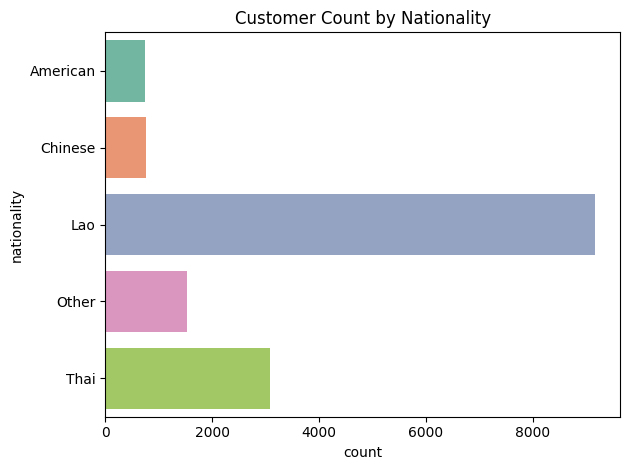

In [201]:
sns.barplot(data= customers_shape_nationality, x='count', y='nationality', palette='Set2')
plt.title('Customer Count by Nationality')
plt.tight_layout()
plt.savefig("Customer_Count_by_Nationality.png", dpi=300)
plt.show()

**Gender**

In [202]:
customers_shape_gender= customers_df.groupby('gender')['customer_id'].count().reset_index().rename(columns=({'customer_id': 'count'}))
customers_shape_gender.sort_values('count', ascending=False).reset_index(drop=True)

gender  count
0  Female   7692
1    Male   7596

C:\Users\Somsa\AppData\Local\Temp\ipykernel_5932\662408707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= customers_shape_gender, x='count', y='gender', palette='Set2')


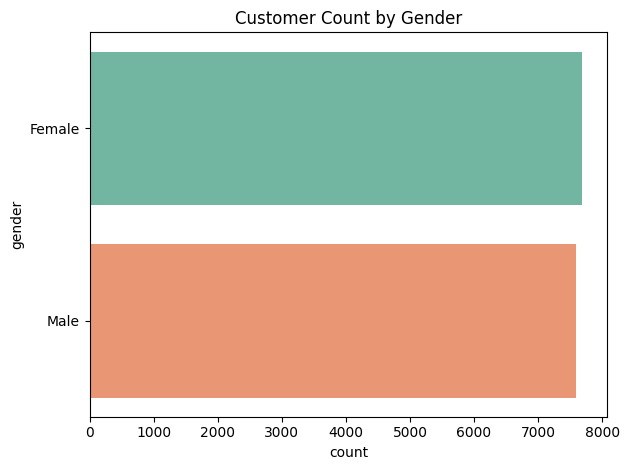

In [203]:
sns.barplot(data= customers_shape_gender, x='count', y='gender', palette='Set2')
plt.title('Customer Count by Gender')
plt.tight_layout()
plt.savefig("Customer_Count_by_Gender.png", dpi=300)
plt.show()

**Payment Method**

In [204]:
customers_shape_paym= customers_df.groupby('payment_methods')['customer_id'].count().reset_index().rename(columns=({'customer_id': 'count'}))
customers_shape_paym.sort_values('count', ascending=False).reset_index(drop=True)

payment_methods  count
0  Mobile Banking   7563
1     Credit Card   5293
2            Cash   2432

###Customer AOV

In [205]:
customer_aov = customer_transaction_df.groupby('customer_id').agg(
    aov = ('total', 'mean')
).reset_index()
customer_aov

customer_id         aov
0      CUST-0000D  406.750000
1      CUST-0008A  134.000000
2      CUST-00092  186.000000
3      CUST-00100  480.666667
4      CUST-0011A   55.333333
...           ...         ...
14562  CUST-FFD03  385.700000
14563  CUST-FFD4E  332.400000
14564  CUST-FFD84  324.800000
14565  CUST-FFE56  657.333333
14566  CUST-FFF5E  489.500000

[14567 rows x 2 columns]

###One-Timer Buyer VS. Repeat Buyer

By separating one-time buyers from repeat buyers, we can calculate customer lifetime value more accurately. Each group behaves differently, so they need different methods to estimate their true value to the business.

**1.Group customer_id and Count purchase_date**

In [206]:
customer_unique = customer_transaction_df.groupby('customer_id')['purchase_date'].nunique().reset_index()
customer_unique.columns = ['customer_id', 'repeat_day_count']
customer_unique

customer_id  repeat_day_count
0      CUST-0000D                 3
1      CUST-0008A                 1
2      CUST-00092                 1
3      CUST-00100                 2
4      CUST-0011A                 1
...           ...               ...
14562  CUST-FFD03                 4
14563  CUST-FFD4E                 3
14564  CUST-FFD84                 4
14565  CUST-FFE56                 2
14566  CUST-FFF5E                 3

[14567 rows x 2 columns]

**2.Separate One-Time Buyer from Repeat Buyer**

In [207]:
one_time_buyer = customer_unique[customer_unique['repeat_day_count'] == 1].reset_index(drop=True)
one_time_buyer

customer_id  repeat_day_count
0     CUST-0008A                 1
1     CUST-00092                 1
2     CUST-0011A                 1
3     CUST-00199                 1
4     CUST-0020E                 1
...          ...               ...
4067  CUST-FF9B1                 1
4068  CUST-FFA55                 1
4069  CUST-FFB7D                 1
4070  CUST-FFC0A                 1
4071  CUST-FFC20                 1

[4072 rows x 2 columns]

In [208]:
repeat_buyer = customer_unique[customer_unique['repeat_day_count'] > 1].reset_index(drop=True)
repeat_buyer

customer_id  repeat_day_count
0      CUST-0000D                 3
1      CUST-00100                 2
2      CUST-00124                 2
3      CUST-00152                 2
4      CUST-00204                 2
...           ...               ...
10490  CUST-FFD03                 4
10491  CUST-FFD4E                 3
10492  CUST-FFD84                 4
10493  CUST-FFE56                 2
10494  CUST-FFF5E                 3

[10495 rows x 2 columns]

**3.Merge together and make label column**

In [209]:
repeat_buyer['buyer_type'] = 'repeat'
one_time_buyer['buyer_type'] = 'one_time'

segment_customer = pd.concat([repeat_buyer, one_time_buyer])
segment_customer

customer_id  repeat_day_count buyer_type
0     CUST-0000D                 3     repeat
1     CUST-00100                 2     repeat
2     CUST-00124                 2     repeat
3     CUST-00152                 2     repeat
4     CUST-00204                 2     repeat
...          ...               ...        ...
4067  CUST-FF9B1                 1   one_time
4068  CUST-FFA55                 1   one_time
4069  CUST-FFB7D                 1   one_time
4070  CUST-FFC0A                 1   one_time
4071  CUST-FFC20                 1   one_time

[14567 rows x 3 columns]

In [210]:
buyer_type_count = segment_customer.groupby('buyer_type')['customer_id'].count().reset_index()
buyer_type_count['buyer_type_pct']= (buyer_type_count['customer_id'] / buyer_type_count['customer_id'].sum() * 100).round(2)
buyer_type_count

buyer_type  customer_id  buyer_type_pct
0   one_time         4072           27.95
1     repeat        10495           72.05

**4.Make [unique_transac] dataframe and merge with segment_customer**

In [211]:
unique_transac = customer_transaction_df.groupby(['purchase_date', 'customer_id', 'transaction_id', 'branch', 'customer_first_touch', 'signup_date', 'signup_month', 'age']).agg({
    'total': 'sum'
}).reset_index()

In [212]:
unique_transac = unique_transac.merge(segment_customer[['customer_id', 'buyer_type', 'repeat_day_count']], on='customer_id', how='left')

#Seperate month and year on year_month
unique_transac['purchase_date'] = pd.to_datetime(unique_transac['purchase_date'])
unique_transac['year_month'] = unique_transac['purchase_date'].dt.to_period('M').astype(str)
unique_transac['year_month'] = pd.to_datetime(unique_transac['year_month'], format='%Y-%m')
unique_transac['year'] = unique_transac['year_month'].dt.year
unique_transac['month'] = unique_transac['year_month'].dt.month_name().str[:3]
unique_transac['month_num'] = unique_transac['year_month'].dt.month
unique_transac['year_month'] = unique_transac['purchase_date'].dt.to_period('M').astype(str)

#Seperate month and year on signup_date
unique_transac['signup_date'] = pd.to_datetime(unique_transac['signup_date'], format='%Y-%m-%d')
unique_transac['signup_month'] = unique_transac['signup_date'].dt.month_name().str[:3]
unique_transac['signup_month_num'] =unique_transac['signup_date'].dt.month
unique_transac['signup_year'] = unique_transac['signup_date'].dt.year
unique_transac['signup_year_month'] = unique_transac['signup_date'].dt.to_period('M').astype(str)
unique_transac

purchase_date customer_id transaction_id            branch  \
0        2022-01-01  CUST-05E12       TX-CBF1E    Vientiane-Shop   
1        2022-01-01  CUST-2E83C       TX-921A4        Pakse-Shop   
2        2022-01-01  CUST-342FE       TX-1AAC0    Online/Website   
3        2022-01-01  CUST-3CE22       TX-E59AE    Vangvieng-Shop   
4        2022-01-01  CUST-43454       TX-EE2E1    Vangvieng-Shop   
...             ...         ...            ...               ...   
35191    2024-12-31  CUST-FE363       TX-520F6  Savanhnaket-Shop   
35192    2024-12-31  CUST-FEA8F       TX-53E3E    Vangvieng-Shop   
35193    2024-12-31  CUST-FEFA0       TX-2E76F    Vientiane-Shop   
35194    2024-12-31  CUST-FF31D       TX-0A85A    Vangvieng-Shop   
35195    2024-12-31  CUST-FFAEF       TX-F3CF3    Online/Website   

      customer_first_touch signup_date signup_month  age  total buyer_type  \
0                  Walk-in  2022-01-01          Jan   47    307     repeat   
1                  Walk-in  2022-01-01          Jan   63   1772     repeat   
2           Influencer_Ref  2022-01-01          Jan   42    265   one_time   
3                  Walk-in  2022-01-01          Jan   55   2373   one_time   
4                  Walk-in  2022-01-01          Jan   18   2334     repeat   
...                    ...         ...          ...  ...    ...        ...   
35191              Walk-in  2024-12-28          Dec   27   1860     repeat   
35192              Walk-in  2024-12-07          Dec   39   2030     repeat   
35193              Walk-in  2024-08-10          Aug   64    850     repeat   
35194              Walk-in  2024-12-28          Dec   37    102     repeat   
35195             Facebook  2024-09-18          Sep   58    372     repeat   

       repeat_day_count year_month  year month  month_num  signup_month_num  \
0                     2    2022-01  2022   Jan          1                 1   
1                     2    2022-01  2022   Jan          1                 1   
2                     1    2022-01  2022   Jan          1                 1   
3                     1    2022-01  2022   Jan          1                 1   
4                     2    2022-01  2022   Jan          1                 1   
...                 ...        ...   ...   ...        ...               ...   
35191                 2    2024-12  2024   Dec         12                12   
35192                 3    2024-12  2024   Dec         12                12   
35193                 3    2024-12  2024   Dec         12                 8   
35194                 2    2024-12  2024   Dec         12                12   
35195                 3    2024-12  2024   Dec         12                 9   

       signup_year signup_year_month  
0             2022           2022-01  
1             2022           2022-01  
2             2022           2022-01  
3             2022           2022-01  
4             2022           2022-01  
...            ...               ...  
35191         2024           2024-12  
35192         2024           2024-12  
35193         2024           2024-08  
35194         2024           2024-12  
35195         2024           2024-09  

[35196 rows x 18 columns]

**5. Customer count monthy**

In [213]:
customer_growth_monthly = unique_transac.groupby(['year_month', 'year', 'month']).agg(
    customer_count= ('customer_id', 'count')
).reset_index()
customer_growth_monthly

year_month  year month  customer_count
0     2022-01  2022   Jan             413
1     2022-02  2022   Feb             498
2     2022-03  2022   Mar             667
3     2022-04  2022   Apr             768
4     2022-05  2022   May             887
5     2022-06  2022   Jun             927
6     2022-07  2022   Jul             949
7     2022-08  2022   Aug             941
8     2022-09  2022   Sep             958
9     2022-10  2022   Oct             980
10    2022-11  2022   Nov             969
11    2022-12  2022   Dec            1009
12    2023-01  2023   Jan             947
13    2023-02  2023   Feb             908
14    2023-03  2023   Mar            1019
15    2023-04  2023   Apr             980
16    2023-05  2023   May            1035
17    2023-06  2023   Jun             963
18    2023-07  2023   Jul             989
19    2023-08  2023   Aug             988
20    2023-09  2023   Sep             976
21    2023-10  2023   Oct            1014
22    2023-11  2023   Nov             999
23    2023-12  2023   Dec             962
24    2024-01  2024   Jan            1049
25    2024-02  2024   Feb             994
26    2024-03  2024   Mar             978
27    2024-04  2024   Apr             972
28    2024-05  2024   May             968
29    2024-06  2024   Jun             953
30    2024-07  2024   Jul             952
31    2024-08  2024   Aug             937
32    2024-09  2024   Sep             959
33    2024-10  2024   Oct            1012
34    2024-11  2024   Nov             925
35    2024-12  2024   Dec            2751

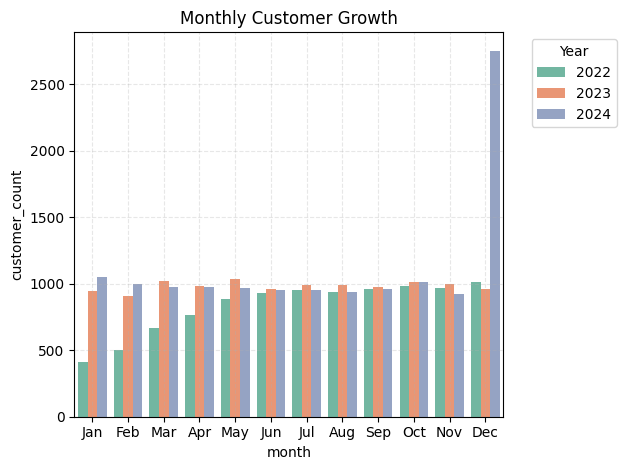

In [214]:
sns.barplot(data= customer_growth_monthly, x='month', y='customer_count', hue='year', palette='Set2');
plt.title('Monthly Customer Growth')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("Monthly_Customer_Growth.png", dpi=300)

**6. Customer Count Yearly**

In [215]:
Customer_growth = unique_transac.groupby('year').agg(
    customer_count= ('customer_id', 'count'))
Customer_growth

customer_count
year                
2022            9966
2023           11780
2024           13450

**7. New Customer Vs. Repeat Customer**

In [216]:
first_purchase = unique_transac.groupby('customer_id')['purchase_date'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']
first_purchase['first_purchase_month'] = first_purchase['first_purchase_date'].dt.to_period('M')

seperate_buyer_type = unique_transac.merge(first_purchase, on='customer_id')
monthly_summary = []

all_months = seperate_buyer_type['year_month'].sort_values().drop_duplicates()

for month in all_months:
    start = pd.to_datetime(month + '-01')
    end = (start + pd.offsets.MonthEnd(1))

    current_df = seperate_buyer_type[(seperate_buyer_type['purchase_date'] >= start) & (seperate_buyer_type['purchase_date'] <= end)]
    current_customers = set(current_df['customer_id'])

    past_df = seperate_buyer_type[seperate_buyer_type['purchase_date'] < start]
    past_customers = set(past_df['customer_id'])

    new_customers = current_customers - past_customers
    repeat_customers = current_customers & past_customers

    monthly_summary.append({
        'year_month': month,
        'total_customers': len(current_customers),
        'new_customers': len(new_customers),
        'repeat_customers': len(repeat_customers)
    })

buyer_type = pd.DataFrame(monthly_summary)
buyer_type['year'] = buyer_type['year_month'].str[:4]
buyer_type['month_num'] = pd.to_datetime(buyer_type['year_month'], format='%Y-%m').dt.month
buyer_type['month'] = pd.to_datetime(buyer_type['year_month'], format='%Y-%m').dt.month_name().str[:3]
buyer_type['repeat_pct'] = (buyer_type['repeat_customers'] / buyer_type['total_customers']) * 100
buyer_type = buyer_type[['year_month', 'year', 'month', 'month_num', 'total_customers', 'new_customers', 'repeat_customers', 'repeat_pct']].round(2)
buyer_type

year_month  year month  month_num  total_customers  new_customers  \
0     2022-01  2022   Jan          1              373            373   
1     2022-02  2022   Feb          2              451            363   
2     2022-03  2022   Mar          3              598            439   
3     2022-04  2022   Apr          4              694            402   
4     2022-05  2022   May          5              791            429   
5     2022-06  2022   Jun          6              830            407   
6     2022-07  2022   Jul          7              863            410   
7     2022-08  2022   Aug          8              842            405   
8     2022-09  2022   Sep          9              866            379   
9     2022-10  2022   Oct         10              882            392   
10    2022-11  2022   Nov         11              873            432   
11    2022-12  2022   Dec         12              904            427   
12    2023-01  2023   Jan          1              870            411   
13    2023-02  2023   Feb          2              832            399   
14    2023-03  2023   Mar          3              929            424   
15    2023-04  2023   Apr          4              882            415   
16    2023-05  2023   May          5              923            396   
17    2023-06  2023   Jun          6              878            403   
18    2023-07  2023   Jul          7              900            417   
19    2023-08  2023   Aug          8              887            386   
20    2023-09  2023   Sep          9              896            408   
21    2023-10  2023   Oct         10              933            416   
22    2023-11  2023   Nov         11              906            428   
23    2023-12  2023   Dec         12              873            396   
24    2024-01  2024   Jan          1              944            449   
25    2024-02  2024   Feb          2              909            392   
26    2024-03  2024   Mar          3              880            409   
27    2024-04  2024   Apr          4              880            380   
28    2024-05  2024   May          5              878            401   
29    2024-06  2024   Jun          6              862            407   
30    2024-07  2024   Jul          7              866            386   
31    2024-08  2024   Aug          8              845            379   
32    2024-09  2024   Sep          9              866            397   
33    2024-10  2024   Oct         10              920            430   
34    2024-11  2024   Nov         11              839            389   
35    2024-12  2024   Dec         12             1349            391   

    repeat_customers  repeat_pct  
0                  0        0.00  
1                 88       19.51  
2                159       26.59  
3                292       42.07  
4                362       45.76  
5                423       50.96  
6                453       52.49  
7                437       51.90  
8                487       56.24  
9                490       55.56  
10               441       50.52  
11               477       52.77  
12               459       52.76  
13               433       52.04  
14               505       54.36  
15               467       52.95  
16               527       57.10  
17               475       54.10  
18               483       53.67  
19               501       56.48  
20               488       54.46  
21               517       55.41  
22               478       52.76  
23               477       54.64  
24               495       52.44  
25               517       56.88  
26               471       53.52  
27               500       56.82  
28               477       54.33  
29               455       52.78  
30               480       55.43  
31               466       55.15  
32               469       54.16  
33               490       53.26  
34               450       53.64  
35               958       71.02

###Customer Health

check how much value each customer provide for business by segment or channel, using customer lifetime value.

**1.Gross Merchandise Value**

**2.Customer Lifetime Value**

CLV will calculate using the net profit per order, assuming a consistent 50% profit margin across all transactions. This simplified approach helped estimate customer value, though it relies on the assumption of uniform profitability.

In [217]:
clv_per_cus = unique_transac.groupby(['year_month', 'year', 'month_num', 'month', 'customer_id', 'buyer_type', 'age'])['total'].sum().reset_index().rename(columns={'total': 'clv'})
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

clv_per_cus['clv'] = clv_per_cus['clv'] / 2
clv_per_cus['age_group'] = pd.cut(clv_per_cus['age'], bins=bins, labels=labels)
clv_per_cus

year_month  year  month_num month customer_id buyer_type  age     clv  \
0        2022-01  2022          1   Jan  CUST-00407     repeat   65   834.0   
1        2022-01  2022          1   Jan  CUST-00605     repeat   47  1086.0   
2        2022-01  2022          1   Jan  CUST-00F18     repeat   35    47.5   
3        2022-01  2022          1   Jan  CUST-01BA9     repeat   65    37.0   
4        2022-01  2022          1   Jan  CUST-025AA     repeat   37   822.0   
...          ...   ...        ...   ...         ...        ...  ...     ...   
31045    2024-12  2024         12   Dec  CUST-FEE5C     repeat   44    38.0   
31046    2024-12  2024         12   Dec  CUST-FEFA0     repeat   64   425.0   
31047    2024-12  2024         12   Dec  CUST-FF31D     repeat   37   854.0   
31048    2024-12  2024         12   Dec  CUST-FF578     repeat   44   101.5   
31049    2024-12  2024         12   Dec  CUST-FFAEF     repeat   58   186.0   

      age_group  
0         56-65  
1         46-55  
2         26-35  
3         56-65  
4         36-45  
...         ...  
31045     36-45  
31046     56-65  
31047     36-45  
31048     36-45  
31049     56-65  

[31050 rows x 9 columns]

**3. CLV and Count by age**

In [218]:
clv_by_age_group = clv_per_cus.groupby('age_group')['clv'].mean().sort_values(ascending=False).reset_index().round(2)
clv_by_age_group['count'] = clv_per_cus.groupby('age_group')['customer_id'].count().reset_index()['customer_id']
clv_by_age_group

C:\Users\Somsa\AppData\Local\Temp\ipykernel_5932\1527823994.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_by_age_group = clv_per_cus.groupby('age_group')['clv'].mean().sort_values(ascending=False).reset_index().round(2)
C:\Users\Somsa\AppData\Local\Temp\ipykernel_5932\1527823994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clv_by_age_group['count'] = clv_per_cus.groupby('age_group')['customer_id'].count().reset_index()['customer_id']


age_group     clv  count
0     46-55  659.49   4660
1     36-45  653.87   6593
2     26-35  647.49   6362
3     56-65  645.38   6360
4     18-25  626.84   6455

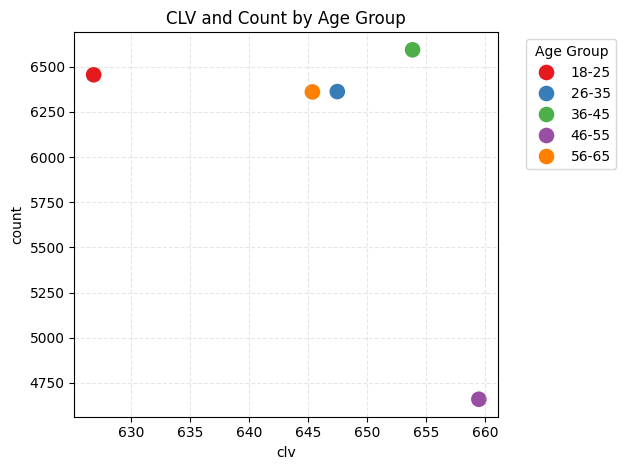

In [219]:
sns.scatterplot(data= clv_by_age_group, x='clv', y='count', hue='age_group', s=150, palette='Set1')
plt.title('CLV and Count by Age Group')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("CLV_and_Count_by_Age_Group.png", dpi=300)
plt.show()

**4. Average CLV MoM**

In [220]:
avg_clv_monthly = clv_per_cus.groupby(['year_month', 'year', 'month_num', 'month'])['clv'].mean().reset_index().round(2).rename(columns=({'month': 'month_str', 'year_month': 'month', 'monthly_clv': 'avg_clv'}))
avg_clv_monthly

month  year  month_num month_str      clv
0   2022-01  2022          1       Jan   669.67
1   2022-02  2022          2       Feb   572.30
2   2022-03  2022          3       Mar   611.42
3   2022-04  2022          4       Apr   626.65
4   2022-05  2022          5       May   623.97
5   2022-06  2022          6       Jun   626.35
6   2022-07  2022          7       Jul   641.63
7   2022-08  2022          8       Aug   641.58
8   2022-09  2022          9       Sep   604.49
9   2022-10  2022         10       Oct   620.30
10  2022-11  2022         11       Nov   559.60
11  2022-12  2022         12       Dec   658.91
12  2023-01  2023          1       Jan   613.40
13  2023-02  2023          2       Feb   592.43
14  2023-03  2023          3       Mar   557.59
15  2023-04  2023          4       Apr   640.66
16  2023-05  2023          5       May   679.23
17  2023-06  2023          6       Jun   620.45
18  2023-07  2023          7       Jul   651.04
19  2023-08  2023          8       Aug   629.70
20  2023-09  2023          9       Sep   594.38
21  2023-10  2023         10       Oct   631.33
22  2023-11  2023         11       Nov   646.83
23  2023-12  2023         12       Dec   623.68
24  2024-01  2024          1       Jan   666.59
25  2024-02  2024          2       Feb   616.90
26  2024-03  2024          3       Mar   680.40
27  2024-04  2024          4       Apr   632.39
28  2024-05  2024          5       May   595.14
29  2024-06  2024          6       Jun   611.72
30  2024-07  2024          7       Jul   588.93
31  2024-08  2024          8       Aug   613.79
32  2024-09  2024          9       Sep   604.46
33  2024-10  2024         10       Oct   651.49
34  2024-11  2024         11       Nov   660.62
35  2024-12  2024         12       Dec  1147.42

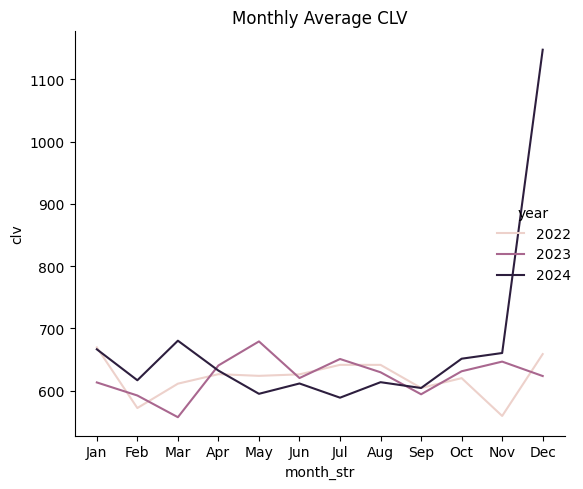

In [221]:
sns.relplot(data= avg_clv_monthly, x='month_str', y='clv', hue='year', kind='line');
plt.title('Monthly Average CLV')
plt.tight_layout()
plt.savefig("Monthly_Average_CLV.png", dpi=300)

**5.CLV by branch** (MoM)

In [222]:
channel_clv_monthly = unique_transac.groupby(['year_month', 'year', 'month_num', 'month', 'branch']).agg({
    'total': 'mean'
}).reset_index().rename(columns={'total': 'monthly_clv'}).round(2)
channel_clv_monthly['monthly_clv'] = channel_clv_monthly['monthly_clv'] / 2
channel_clv_monthly

year_month  year  month_num month             branch  monthly_clv
0      2022-01  2022          1   Jan  Luangprabang-Shop      594.195
1      2022-01  2022          1   Jan     Online/Website      505.830
2      2022-01  2022          1   Jan         Pakse-Shop      724.640
3      2022-01  2022          1   Jan   Savanhnaket-Shop      919.735
4      2022-01  2022          1   Jan     Vangvieng-Shop      622.685
..         ...   ...        ...   ...                ...          ...
211    2024-12  2024         12   Dec     Online/Website      601.685
212    2024-12  2024         12   Dec         Pakse-Shop      551.255
213    2024-12  2024         12   Dec   Savanhnaket-Shop      538.625
214    2024-12  2024         12   Dec     Vangvieng-Shop      609.750
215    2024-12  2024         12   Dec     Vientiane-Shop      576.785

[216 rows x 6 columns]

**5.1 avg clv by branch**

In [223]:
clv_by_channel = channel_clv_monthly.groupby('branch')['monthly_clv'].mean().reset_index().rename(columns={'monthly_clv': 'avg_clv'}).round(2)
clv_by_channel

branch  avg_clv
0  Luangprabang-Shop   579.71
1     Online/Website   555.78
2         Pakse-Shop   570.94
3   Savanhnaket-Shop   588.61
4     Vangvieng-Shop   591.48
5     Vientiane-Shop   558.42

C:\Users\Somsa\AppData\Local\Temp\ipykernel_5932\789197329.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= clv_by_channel, x='avg_clv', y='branch', palette='Set2')


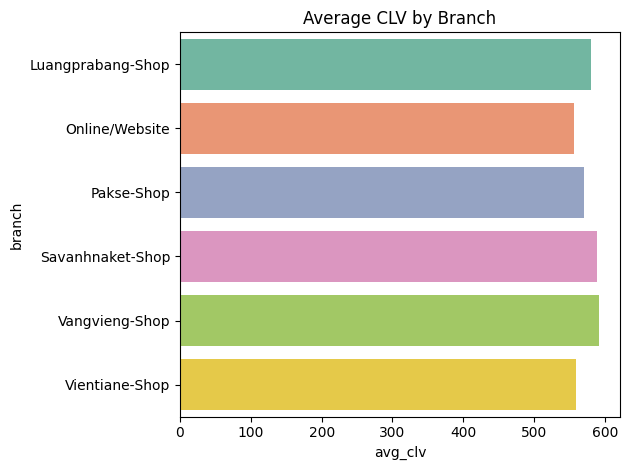

In [224]:
sns.barplot(data= clv_by_channel, x='avg_clv', y='branch', palette='Set2')
plt.title('Average CLV by Branch')
plt.tight_layout()
plt.savefig("Average_CLV_by_Branch.png", dpi=300)
plt.show()

###Growth By Branch

Check each branch's performance

In [225]:
# Group by channel and agg
channel_growth = unique_transac.groupby(['year_month', 'year', 'month', 'branch']).agg(
    total_sales=('total', 'sum'),
    avg_sales=('total', 'mean'),
    total_orders=('transaction_id', 'count')
).reset_index().round(2)

channel_growth

year_month  year month             branch  total_sales  avg_sales  \
0      2022-01  2022   Jan  Luangprabang-Shop       121216    1188.39   
1      2022-01  2022   Jan     Online/Website       112294    1011.66   
2      2022-01  2022   Jan         Pakse-Shop        62319    1449.28   
3      2022-01  2022   Jan   Savanhnaket-Shop        90134    1839.47   
4      2022-01  2022   Jan     Vangvieng-Shop        53551    1245.37   
..         ...   ...   ...                ...          ...        ...   
211    2024-12  2024   Dec     Online/Website       736460    1203.37   
212    2024-12  2024   Dec         Pakse-Shop       340675    1102.51   
213    2024-12  2024   Dec   Savanhnaket-Shop       403969    1077.25   
214    2024-12  2024   Dec     Vangvieng-Shop       346337    1219.50   
215    2024-12  2024   Dec     Vientiane-Shop       633310    1153.57   

     total_orders  
0             102  
1             111  
2              43  
3              49  
4              43  
..            ...  
211           612  
212           309  
213           375  
214           284  
215           549  

[216 rows x 7 columns]

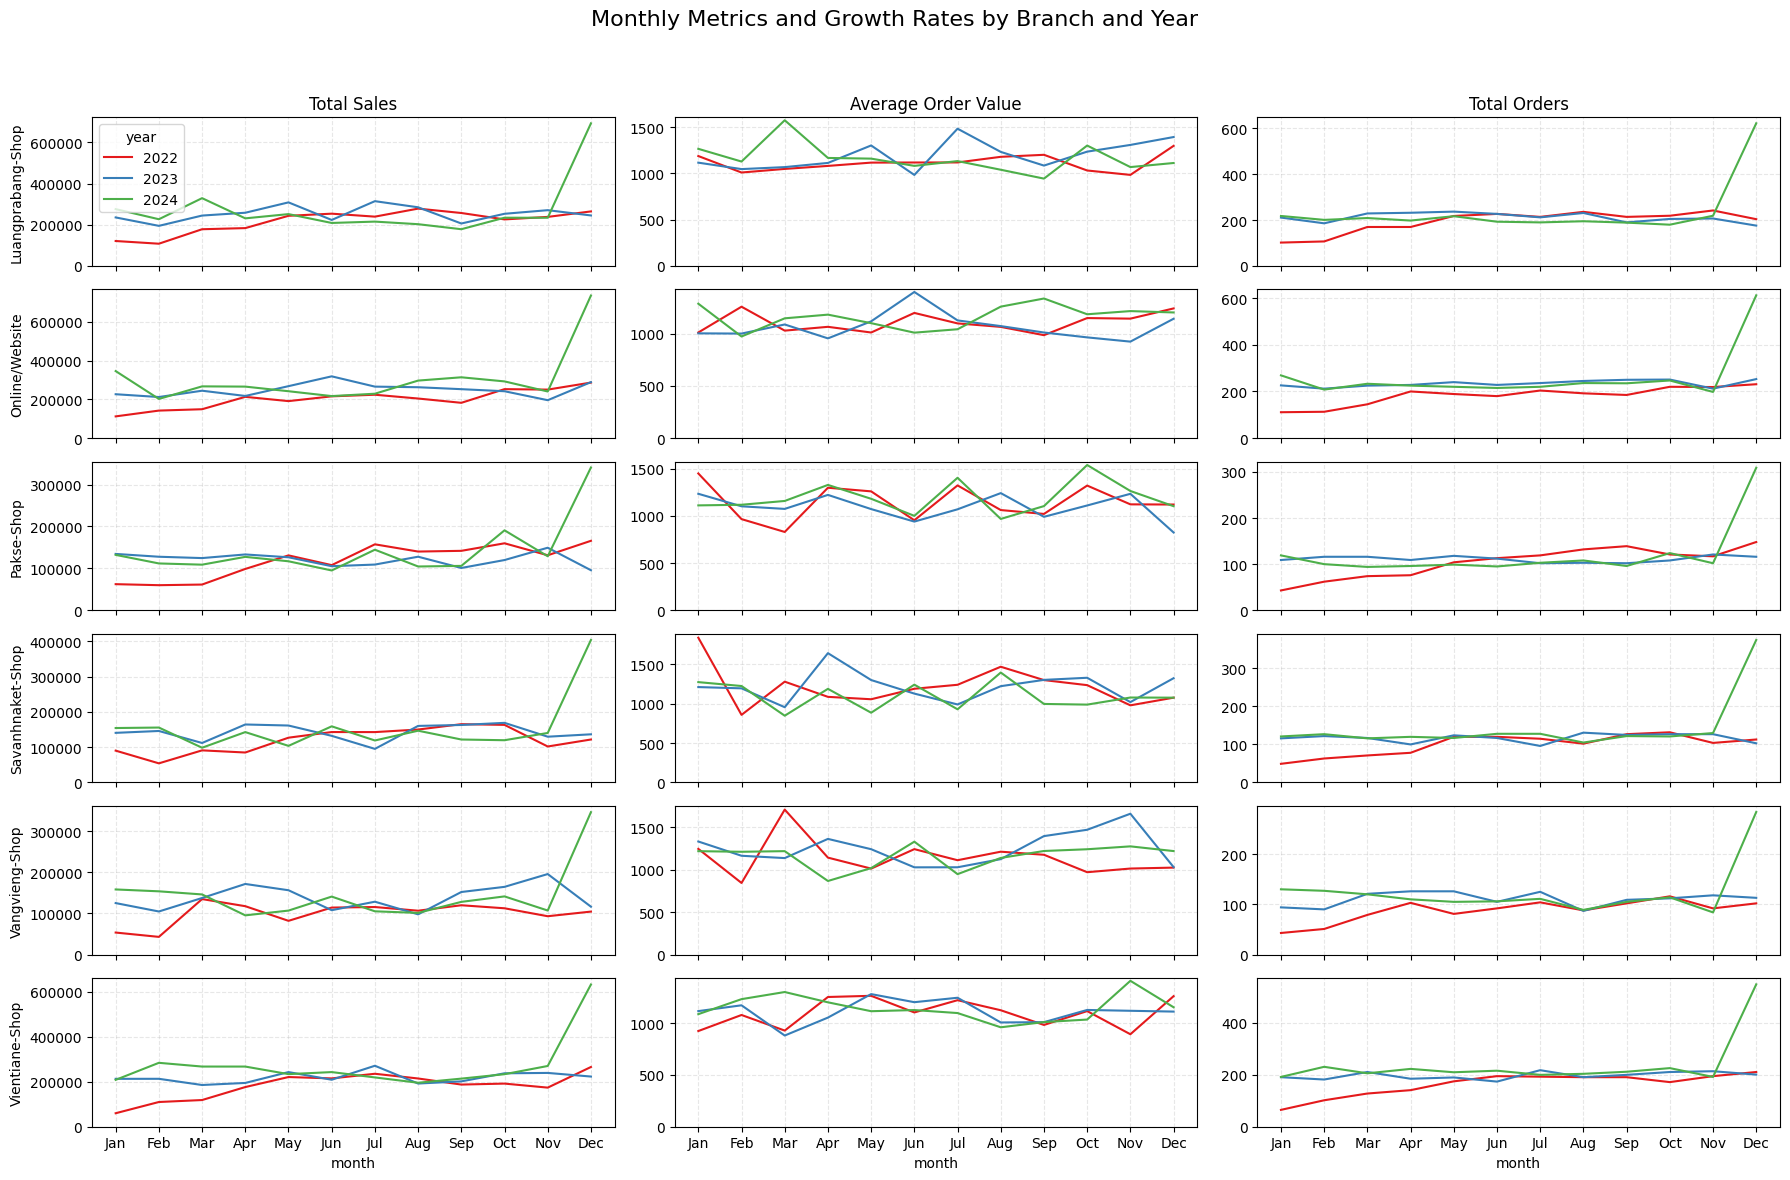

In [226]:

branches = channel_growth['branch'].unique()
metrics = [
    ('total_sales', 'Total Sales'),
    ('avg_sales', 'Average Order Value'),
    ('total_orders', 'Total Orders')
]
fig, axes = plt.subplots(nrows=len(branches), ncols=3, figsize=(18, 12), sharex= True)

for row_idx, branch in enumerate(branches):
    branch_data = channel_growth[channel_growth['branch'] == branch]

    for col_idx, (metric, label) in enumerate(metrics):
        ax= axes[row_idx, col_idx]
        sns.lineplot(data=branch_data, x='month', y=metric, hue='year', palette='Set1', ax=ax)

        if row_idx == 0:
            ax.set_title(label)
        if col_idx == 0:
            ax.set_ylabel(f'{branch}')
        else:
            ax.set_ylabel('')

        ax.set_xticks(range(0, 12))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.set_ylim(0)

        if not (row_idx == 0 and col_idx == 0):
            ax.get_legend().remove()


plt.suptitle('Monthly Metrics and Growth Rates by Branch and Year', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Monthly_Metrics_and_Growth_Rates_by_Branch_and_Year.png", dpi=300)
plt.show()

###Customer Acquisition Efficiency


Understanding insights at the acquisition level enables you to quantify customer acquisition cost (CAC) and assess the performance efficiency of each marketing channel. These insights are critical for optimizing spend and strategically reallocating the marketing budget to maximize ROI.

Since this is mocked data and does not include **UTM parameters** as in real-world performance marketing, channel performance will be assessed based on the month each channel received spend, using a month-on-month comparison.

**1.Acquisition Channel Efficiency**

In [227]:
acquisition_channel_clv = unique_transac.groupby(['signup_year_month', 'signup_year', 'signup_month_num', 'signup_month', 'customer_first_touch']).agg(
    clv= ('total', 'mean'),
    count= ('customer_first_touch', 'count')
).reset_index().rename(columns=({'signup_year_month': 'month', 'signup_month': 'month_str', 'signup_year': 'year', 'signup_month_num': 'month_num'})).round(2)
acquisition_channel_clv['clv'] = acquisition_channel_clv['clv'] / 2
acquisition_channel_clv

month  year  month_num month_str customer_first_touch      clv  count
0    2022-01  2022          1       Jan             Facebook  646.765     40
1    2022-01  2022          1       Jan       Influencer_Ref  518.735     92
2    2022-01  2022          1       Jan            Instagram  409.450     21
3    2022-01  2022          1       Jan               Tiktok  698.415     66
4    2022-01  2022          1       Jan              Walk-in  636.460    672
..       ...   ...        ...       ...                  ...      ...    ...
211  2024-12  2024         12       Dec       Influencer_Ref  765.710    106
212  2024-12  2024         12       Dec            Instagram  447.295     29
213  2024-12  2024         12       Dec               Tiktok  550.350     40
214  2024-12  2024         12       Dec              Walk-in  595.120    765
215  2024-12  2024         12       Dec              Website  426.930      7

[216 rows x 7 columns]

**1.1 Yearly Acquisition Channel Performance**

In [228]:
acquisition_channel_yearly = acquisition_channel_clv.groupby(['year', 'customer_first_touch']).agg(
    clv= ('clv', 'mean'),
    count= ('count', 'sum')
).reset_index().round(2)
acquisition_channel_yearly

year customer_first_touch     clv  count
0   2022             Facebook  517.07    467
1   2022       Influencer_Ref  549.15   1056
2   2022            Instagram  520.06    292
3   2022               Tiktok  484.54    534
4   2022              Walk-in  571.48   9114
5   2022              Website  653.99    211
6   2023             Facebook  583.42    608
7   2023       Influencer_Ref  542.79   1266
8   2023            Instagram  464.50    329
9   2023               Tiktok  624.46    547
10  2023              Walk-in  577.98   8948
11  2023              Website  568.82    207
12  2024             Facebook  608.79    533
13  2024       Influencer_Ref  556.46   1120
14  2024            Instagram  576.68    326
15  2024               Tiktok  589.87    504
16  2024              Walk-in  575.03   8954
17  2024              Website  506.81    180

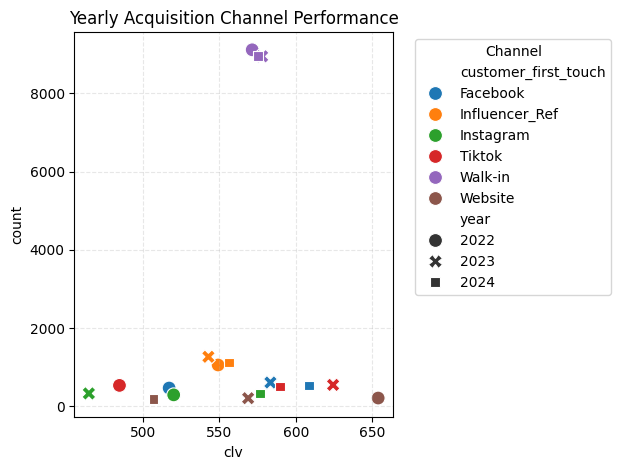

In [229]:
sns.scatterplot(data= acquisition_channel_yearly, x='clv', y='count', hue='customer_first_touch', style='year', s=100)
plt.title('Yearly Acquisition Channel Performance')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("Yearly_Acquisition_Channel_Performance.png", dpi=300)
plt.show()

**2.Overall Acquisition Cost(CAC)**

In [230]:
#filter only row that signup_year_month == year_month
new_customers = (unique_transac[unique_transac['signup_year_month'] == unique_transac['year_month']]).reset_index(drop=True)

#count acquisition
acquisition_count = new_customers.groupby(['signup_year_month', 'signup_year', 'signup_month_num', 'signup_month'])['customer_first_touch'].count().reset_index().rename(columns=({'signup_year_month': 'month', 'signup_month': 'month_str', 'customer_first_touch': 'new_customer'}))

#Merge
marketing_cac_monthly = acquisition_count.merge(monthly_marketing_spend, on='month', how='left')
marketing_cac_monthly['cac'] = marketing_cac_monthly['spend'] / marketing_cac_monthly['new_customer']
marketing_cac_monthly['cac'] = marketing_cac_monthly['cac'].round(2)

marketing_cac_monthly

month  signup_year  signup_month_num month_str  new_customer  spend  \
0   2022-01         2022                 1       Jan           413  10800   
1   2022-02         2022                 2       Feb           400   7809   
2   2022-03         2022                 3       Mar           494   5629   
3   2022-04         2022                 4       Apr           446  12560   
4   2022-05         2022                 5       May           484   9313   
5   2022-06         2022                 6       Jun           461   2449   
6   2022-07         2022                 7       Jul           446   6748   
7   2022-08         2022                 8       Aug           453   9234   
8   2022-09         2022                 9       Sep           431   5206   
9   2022-10         2022                10       Oct           428   8781   
10  2022-11         2022                11       Nov           480   3461   
11  2022-12         2022                12       Dec           478   7398   
12  2023-01         2023                 1       Jan           449  11385   
13  2023-02         2023                 2       Feb           436   7535   
14  2023-03         2023                 3       Mar           470  13859   
15  2023-04         2023                 4       Apr           463   9786   
16  2023-05         2023                 5       May           440   8678   
17  2023-06         2023                 6       Jun           437   6578   
18  2023-07         2023                 7       Jul           450   9388   
19  2023-08         2023                 8       Aug           432   8638   
20  2023-09         2023                 9       Sep           443   7437   
21  2023-10         2023                10       Oct           450   5871   
22  2023-11         2023                11       Nov           479  13699   
23  2023-12         2023                12       Dec           436  13406   
24  2024-01         2024                 1       Jan           501  11397   
25  2024-02         2024                 2       Feb           430   8474   
26  2024-03         2024                 3       Mar           456   9262   
27  2024-04         2024                 4       Apr           414  13184   
28  2024-05         2024                 5       May           446   6077   
29  2024-06         2024                 6       Jun           449   9381   
30  2024-07         2024                 7       Jul           420   6643   
31  2024-08         2024                 8       Aug           427   7976   
32  2024-09         2024                 9       Sep           434   5466   
33  2024-10         2024                10       Oct           472   6281   
34  2024-11         2024                11       Nov           427   5233   
35  2024-12         2024                12       Dec           977  10189   

      cac  
0   26.15  
1   19.52  
2   11.39  
3   28.16  
4   19.24  
5    5.31  
6   15.13  
7   20.38  
8   12.08  
9   20.52  
10   7.21  
11  15.48  
12  25.36  
13  17.28  
14  29.49  
15  21.14  
16  19.72  
17  15.05  
18  20.86  
19  20.00  
20  16.79  
21  13.05  
22  28.60  
23  30.75  
24  22.75  
25  19.71  
26  20.31  
27  31.85  
28  13.63  
29  20.89  
30  15.82  
31  18.68  
32  12.59  
33  13.31  
34  12.26  
35  10.43

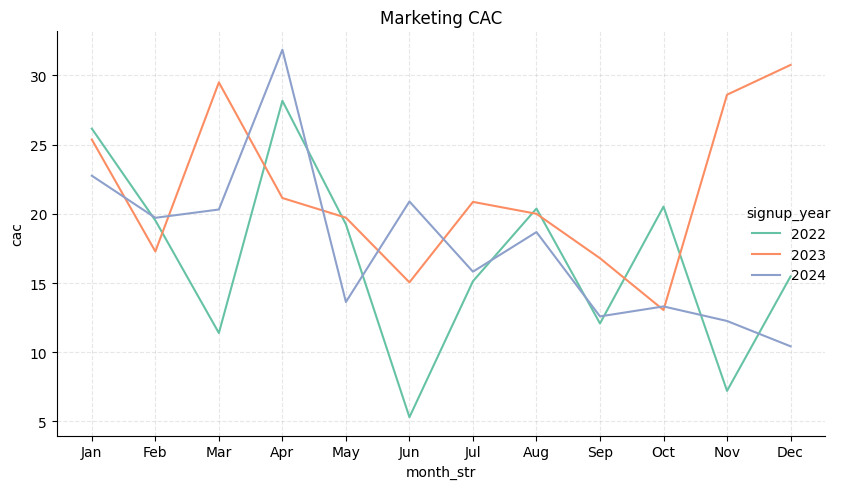

In [231]:
sns.relplot(data= marketing_cac_monthly, x='month_str', y='cac', hue='signup_year', kind='line', height=5, aspect=1.5, palette='Set2' )
plt.title('Marketing CAC')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("Marketing_CAC.png", dpi=300)
plt.show()

In [232]:
marketing_cac_monthly['cac'].mean()

np.float64(18.63583333333333)

**3 Acquisition cost by acq_team_cost + marketing_spend (Manpower CAC)**

In [233]:
total_cac_monthly = acquisition_count.merge(total_spend, on='month', how='left')
total_cac_monthly['cac'] = (total_cac_monthly['marketing_spend'] + total_cac_monthly['acq_team_cost']) / total_cac_monthly['new_customer']
total_cac_monthly['cac'] = total_cac_monthly['cac'].round(2)

total_cac_monthly = total_cac_monthly[['month', 'new_customer', 'acq_team_cost', 'marketing_spend', 'cac']]
total_cac_monthly['month'] = pd.to_datetime(total_cac_monthly['month'])
total_cac_monthly['month'] = total_cac_monthly['month'].dt.to_period('M').astype(str)
total_cac_monthly['month_str'] = pd.to_datetime(total_cac_monthly['month'], format='%Y-%m').dt.month_name().str[:3]
total_cac_monthly['year'] = total_cac_monthly['month'].str[:4]  
total_cac_monthly

month  new_customer  acq_team_cost  marketing_spend    cac month_str  \
0   2022-01           413        11620.0            10800  54.29       Jan   
1   2022-02           400        11620.0             7809  48.57       Feb   
2   2022-03           494        11620.0             5629  34.92       Mar   
3   2022-04           446        11620.0            12560  54.22       Apr   
4   2022-05           484        11620.0             9313  43.25       May   
5   2022-06           461        11620.0             2449  30.52       Jun   
6   2022-07           446        11620.0             6748  41.18       Jul   
7   2022-08           453        11620.0             9234  46.04       Aug   
8   2022-09           431        11620.0             5206  39.04       Sep   
9   2022-10           428        11620.0             8781  47.67       Oct   
10  2022-11           480        11620.0             3461  31.42       Nov   
11  2022-12           478        11620.0             7398  39.79       Dec   
12  2023-01           449        11620.0            11385  51.24       Jan   
13  2023-02           436        11620.0             7535  43.93       Feb   
14  2023-03           470        11620.0            13859  54.21       Mar   
15  2023-04           463        11620.0             9786  46.23       Apr   
16  2023-05           440        11620.0             8678  46.13       May   
17  2023-06           437        11620.0             6578  41.64       Jun   
18  2023-07           450        11620.0             9388  46.68       Jul   
19  2023-08           432        11620.0             8638  46.89       Aug   
20  2023-09           443        11620.0             7437  43.02       Sep   
21  2023-10           450        11620.0             5871  38.87       Oct   
22  2023-11           479        11620.0            13699  52.86       Nov   
23  2023-12           436        11620.0            13406  57.40       Dec   
24  2024-01           501        11620.0            11397  45.94       Jan   
25  2024-02           430        11620.0             8474  46.73       Feb   
26  2024-03           456        11620.0             9262  45.79       Mar   
27  2024-04           414        11620.0            13184  59.91       Apr   
28  2024-05           446        11620.0             6077  39.68       May   
29  2024-06           449        11620.0             9381  46.77       Jun   
30  2024-07           420        11620.0             6643  43.48       Jul   
31  2024-08           427        11620.0             7976  45.89       Aug   
32  2024-09           434        11620.0             5466  39.37       Sep   
33  2024-10           472        11620.0             6281  37.93       Oct   
34  2024-11           427        11620.0             5233  39.47       Nov   
35  2024-12           977        11620.0            10189  22.32       Dec   

    year  
0   2022  
1   2022  
2   2022  
3   2022  
4   2022  
5   2022  
6   2022  
7   2022  
8   2022  
9   2022  
10  2022  
11  2022  
12  2023  
13  2023  
14  2023  
15  2023  
16  2023  
17  2023  
18  2023  
19  2023  
20  2023  
21  2023  
22  2023  
23  2023  
24  2024  
25  2024  
26  2024  
27  2024  
28  2024  
29  2024  
30  2024  
31  2024  
32  2024  
33  2024  
34  2024  
35  2024

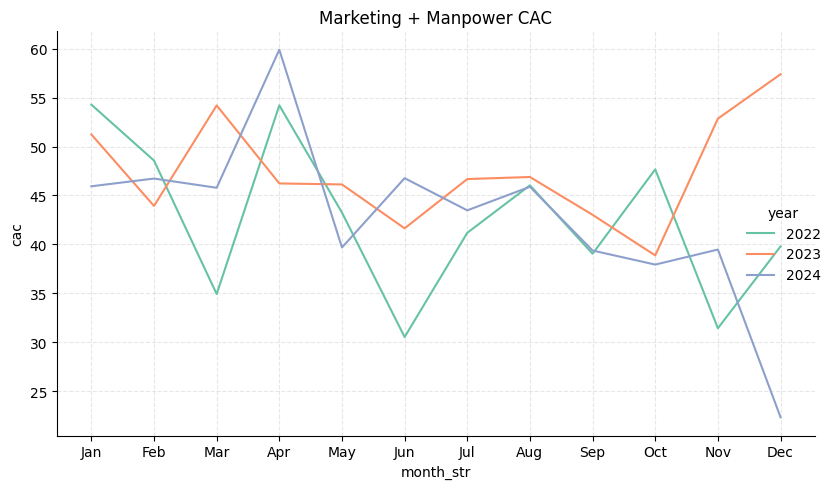

In [234]:
sns.relplot(data= total_cac_monthly, x='month_str', y='cac', hue='year', kind='line', height=5, aspect=1.5, palette='Set2' )
plt.title('Marketing + Manpower CAC')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.3)
plt.savefig("Marketing_Manpower_CAC.png", dpi=300)
plt.show()

In [235]:
total_cac_monthly['cac'].mean()

np.float64(44.25805555555555)

###Return of Ads Spend

ROAS shows whether it's worth acquiring new customers by comparing CLV to CAC. If CLV is higher than CAC, the channel is profitable and if not, it's a red flag for overspending.


using **avg_clv_monthy** and **total_cac_monthly**

In [236]:
roas_clv_cac = avg_clv_monthly.merge(total_cac_monthly, on='month', how='left')
roas_clv_cac.head()

month  year_x  month_num month_str_x     clv  new_customer  \
0  2022-01    2022          1         Jan  669.67           413   
1  2022-02    2022          2         Feb  572.30           400   
2  2022-03    2022          3         Mar  611.42           494   
3  2022-04    2022          4         Apr  626.65           446   
4  2022-05    2022          5         May  623.97           484   

   acq_team_cost  marketing_spend    cac month_str_y year_y  
0        11620.0            10800  54.29         Jan   2022  
1        11620.0             7809  48.57         Feb   2022  
2        11620.0             5629  34.92         Mar   2022  
3        11620.0            12560  54.22         Apr   2022  
4        11620.0             9313  43.25         May   2022

In [237]:
roas_clv_cac = avg_clv_monthly.merge(total_cac_monthly, on='month', how='left')
roas_clv_cac = roas_clv_cac[['month', 'year_x', 'month_str_x', 'clv', 'cac']]
roas_clv_cac['ratio'] = (roas_clv_cac['clv'] / roas_clv_cac['cac']).round(2)
roas_clv_cac = roas_clv_cac.rename(columns=({'month_str_x': 'month_str', 'year_x': 'year'}))
roas_clv_cac

month  year month_str      clv    cac  ratio
0   2022-01  2022       Jan   669.67  54.29  12.34
1   2022-02  2022       Feb   572.30  48.57  11.78
2   2022-03  2022       Mar   611.42  34.92  17.51
3   2022-04  2022       Apr   626.65  54.22  11.56
4   2022-05  2022       May   623.97  43.25  14.43
5   2022-06  2022       Jun   626.35  30.52  20.52
6   2022-07  2022       Jul   641.63  41.18  15.58
7   2022-08  2022       Aug   641.58  46.04  13.94
8   2022-09  2022       Sep   604.49  39.04  15.48
9   2022-10  2022       Oct   620.30  47.67  13.01
10  2022-11  2022       Nov   559.60  31.42  17.81
11  2022-12  2022       Dec   658.91  39.79  16.56
12  2023-01  2023       Jan   613.40  51.24  11.97
13  2023-02  2023       Feb   592.43  43.93  13.49
14  2023-03  2023       Mar   557.59  54.21  10.29
15  2023-04  2023       Apr   640.66  46.23  13.86
16  2023-05  2023       May   679.23  46.13  14.72
17  2023-06  2023       Jun   620.45  41.64  14.90
18  2023-07  2023       Jul   651.04  46.68  13.95
19  2023-08  2023       Aug   629.70  46.89  13.43
20  2023-09  2023       Sep   594.38  43.02  13.82
21  2023-10  2023       Oct   631.33  38.87  16.24
22  2023-11  2023       Nov   646.83  52.86  12.24
23  2023-12  2023       Dec   623.68  57.40  10.87
24  2024-01  2024       Jan   666.59  45.94  14.51
25  2024-02  2024       Feb   616.90  46.73  13.20
26  2024-03  2024       Mar   680.40  45.79  14.86
27  2024-04  2024       Apr   632.39  59.91  10.56
28  2024-05  2024       May   595.14  39.68  15.00
29  2024-06  2024       Jun   611.72  46.77  13.08
30  2024-07  2024       Jul   588.93  43.48  13.54
31  2024-08  2024       Aug   613.79  45.89  13.38
32  2024-09  2024       Sep   604.46  39.37  15.35
33  2024-10  2024       Oct   651.49  37.93  17.18
34  2024-11  2024       Nov   660.62  39.47  16.74
35  2024-12  2024       Dec  1147.42  22.32  51.41

In [238]:
mean_ratio = roas_clv_cac['ratio'].mean()
mean_ratio

np.float64(15.253055555555555)

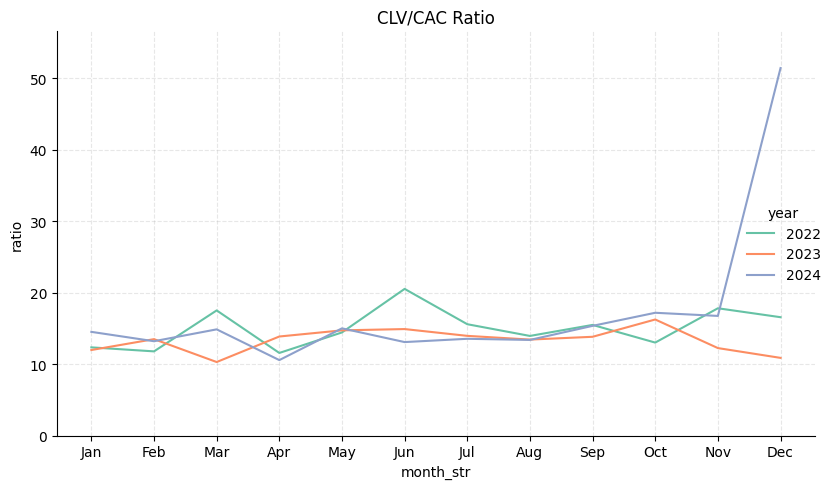

In [239]:
sns.relplot(data= roas_clv_cac, x='month_str', y='ratio', hue='year', kind='line', height=5, aspect=1.5, palette='Set2' )
plt.title('CLV/CAC Ratio')
plt.ylim(0, roas_clv_cac['ratio'].max() * 1.1)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("CLVCAC_Ratio.png", dpi=300)
plt.show()

##Influencer Performance

Influencer performance refers to evaluating which influencers deliver the highest return on investment (ROI), enabling us to identify and reinvest in the most effective partners for future campaigns.

Since this is mocked data and does not include **UTM parameters** like in real-world performance marketing, the performance will be assessed based on the month we paid each influencer, using a month-on-month comparison.

###influencer_cost

In [240]:
influencer_cost = marketing_spend_df.query("channel == 'Influencer'").reset_index(drop= True)
influencer_cost = influencer_cost.merge(influencers_df, on='influencer_id', how='left')

#Change Time Period
influencer_cost['month'] = pd.to_datetime(influencer_cost['month'])
influencer_cost['month'] = influencer_cost['month'].dt.to_period('M').astype(str)
influencer_cost

month     channel  spend influencer_id      channel_name  gender  \
0   2022-01  Influencer   1620    INFL-B0C1A       RandyGadget    Male   
1   2022-02  Influencer   2028    INFL-2DF43    JenniferGadget    Male   
2   2022-03  Influencer   2144    INFL-46071      BeverlySport    Male   
3   2022-04  Influencer   1780    INFL-1AB8D     ShannonCardio  Female   
4   2022-05  Influencer   2244    INFL-D4694       JaniceSport  Female   
5   2022-06  Influencer    858    INFL-BE95D    MichaelAcademy  Female   
6   2022-07  Influencer   1122    INFL-CCAC0  MichelleUniverse  Female   
7   2022-08  Influencer   2151    INFL-DB704       HollyCardio    Male   
8   2022-09  Influencer   1463    INFL-C8A00        TammySport  Female   
9   2022-10  Influencer   2020    INFL-77B42       CarolTravel    Male   
10  2022-11  Influencer    858    INFL-BE95D    MichaelAcademy  Female   
11  2022-12  Influencer   1660    INFL-B4158     KristinTravel  Female   
12  2023-01  Influencer   1538    INFL-1BE1E      RubenPodcast    Male   
13  2023-02  Influencer    858    INFL-BE95D    MichaelAcademy  Female   
14  2023-03  Influencer   2437    INFL-25D0D    NicholasGadget  Female   
15  2023-04  Influencer   1118    INFL-56DBF         BrianLand    Male   
16  2023-05  Influencer   1463    INFL-C8A00        TammySport  Female   
17  2023-06  Influencer   2151    INFL-DB704       HollyCardio    Male   
18  2023-07  Influencer   2373    INFL-5499F   VirginiaAcademy  Female   
19  2023-08  Influencer   2373    INFL-5499F   VirginiaAcademy  Female   
20  2023-09  Influencer   1780    INFL-1AB8D     ShannonCardio  Female   
21  2023-10  Influencer   1431    INFL-2BFD0    KathleenGadget    Male   
22  2023-11  Influencer   2028    INFL-2DF43    JenniferGadget    Male   
23  2023-12  Influencer   1737    INFL-C3D54        RyanCardio  Female   
24  2024-01  Influencer   1660    INFL-B4158     KristinTravel  Female   
25  2024-02  Influencer   1024    INFL-A01B3       CarmenSport  Female   
26  2024-03  Influencer   1737    INFL-C3D54        RyanCardio  Female   
27  2024-04  Influencer   1780    INFL-1AB8D     ShannonCardio  Female   
28  2024-05  Influencer   1024    INFL-A01B3       CarmenSport  Female   
29  2024-06  Influencer   1128    INFL-348AB          RyanTeam  Female   
30  2024-07  Influencer   1463    INFL-C8A00        TammySport  Female   
31  2024-08  Influencer   2244    INFL-D4694       JaniceSport  Female   
32  2024-09  Influencer   1614    INFL-C626D       ScottGadget  Female   
33  2024-10  Influencer   1638    INFL-5256E      TristanSport    Male   
34  2024-11  Influencer   2028    INFL-2DF43    JenniferGadget    Male   
35  2024-12  Influencer   1737    INFL-C3D54        RyanCardio  Female   

    rate_card  
0        1620  
1        2028  
2        2144  
3        1780  
4        2244  
5         858  
6        1122  
7        2151  
8        1463  
9        2020  
10        858  
11       1660  
12       1538  
13        858  
14       2437  
15       1118  
16       1463  
17       2151  
18       2373  
19       2373  
20       1780  
21       1431  
22       2028  
23       1737  
24       1660  
25       1024  
26       1737  
27       1780  
28       1024  
29       1128  
30       1463  
31       2244  
32       1614  
33       1638  
34       2028  
35       1737

In [241]:
influencer_cost.to_csv('influencer_cost.csv')

###Influencer Acquisition

**1.Filter df**

In [242]:
# Filter only Influencer_Ref
influencer_ref = unique_transac.query('customer_first_touch == "Influencer_Ref"').reset_index(drop=True).rename(columns=({'month': 'month_str', 'year_month': 'month'}))
#merge
influencer_ref = influencer_ref.merge(influencer_cost, on='month', how='left').rename(columns=({'channel_x': 'channel', 'channel_y': 'm_channel'}))
influencer_ref

purchase_date customer_id transaction_id          branch  \
0       2022-01-01  CUST-342FE       TX-1AAC0  Online/Website   
1       2022-01-04  CUST-29E01       TX-88951  Online/Website   
2       2022-01-05  CUST-1A659       TX-62D9E  Online/Website   
3       2022-01-06  CUST-182F9       TX-795FE  Online/Website   
4       2022-01-06  CUST-8D8A4       TX-931E6  Online/Website   
...            ...         ...            ...             ...   
3437    2024-12-31  CUST-F943B       TX-F29B4  Online/Website   
3438    2024-12-31  CUST-F98E0       TX-04571  Online/Website   
3439    2024-12-31  CUST-F98E0       TX-D32A6  Online/Website   
3440    2024-12-31  CUST-FAFA7       TX-348B9  Online/Website   
3441    2024-12-31  CUST-FAFA7       TX-C31BD  Online/Website   

     customer_first_touch signup_date signup_month  age  total buyer_type  \
0          Influencer_Ref  2022-01-01          Jan   42    265   one_time   
1          Influencer_Ref  2022-01-04          Jan   21    604     repeat   
2          Influencer_Ref  2022-01-05          Jan   26   2514     repeat   
3          Influencer_Ref  2022-01-06          Jan   27    495     repeat   
4          Influencer_Ref  2022-01-06          Jan   22     30     repeat   
...                   ...         ...          ...  ...    ...        ...   
3437       Influencer_Ref  2024-12-02          Dec   31    283     repeat   
3438       Influencer_Ref  2024-10-09          Oct   59    565     repeat   
3439       Influencer_Ref  2024-10-09          Oct   59    376     repeat   
3440       Influencer_Ref  2024-12-26          Dec   42   2501     repeat   
3441       Influencer_Ref  2024-12-26          Dec   42    172     repeat   

      ...  month_num signup_month_num  signup_year signup_year_month  \
0     ...          1                1         2022           2022-01   
1     ...          1                1         2022           2022-01   
2     ...          1                1         2022           2022-01   
3     ...          1                1         2022           2022-01   
4     ...          1                1         2022           2022-01   
...   ...        ...              ...          ...               ...   
3437  ...         12               12         2024           2024-12   
3438  ...         12               10         2024           2024-10   
3439  ...         12               10         2024           2024-10   
3440  ...         12               12         2024           2024-12   
3441  ...         12               12         2024           2024-12   

         channel  spend  influencer_id channel_name  gender  rate_card  
0     Influencer   1620     INFL-B0C1A  RandyGadget    Male       1620  
1     Influencer   1620     INFL-B0C1A  RandyGadget    Male       1620  
2     Influencer   1620     INFL-B0C1A  RandyGadget    Male       1620  
3     Influencer   1620     INFL-B0C1A  RandyGadget    Male       1620  
4     Influencer   1620     INFL-B0C1A  RandyGadget    Male       1620  
...          ...    ...            ...          ...     ...        ...  
3437  Influencer   1737     INFL-C3D54   RyanCardio  Female       1737  
3438  Influencer   1737     INFL-C3D54   RyanCardio  Female       1737  
3439  Influencer   1737     INFL-C3D54   RyanCardio  Female       1737  
3440  Influencer   1737     INFL-C3D54   RyanCardio  Female       1737  
3441  Influencer   1737     INFL-C3D54   RyanCardio  Female       1737  

[3442 rows x 24 columns]

**2.Influencer effienciency**

In [243]:
#acquisition total sale by buyer type (MoM)
influencer_acq = influencer_ref.groupby(['month','channel_name']).agg(
    total= ('total', 'sum'),
    count= ('customer_id', 'count')
).reset_index()
influencer_acq

month      channel_name   total  count
0   2022-01       RandyGadget   45357     46
1   2022-02    JenniferGadget   52429     47
2   2022-03      BeverlySport   65758     58
3   2022-04     ShannonCardio   82259     83
4   2022-05       JaniceSport   88682     89
5   2022-06    MichaelAcademy   85322     80
6   2022-07  MichelleUniverse  115130     86
7   2022-08       HollyCardio   98253     84
8   2022-09        TammySport   65301     79
9   2022-10       CarolTravel   74891     85
10  2022-11    MichaelAcademy  121549     96
11  2022-12     KristinTravel  118787     90
12  2023-01      RubenPodcast  109754    101
13  2023-02    MichaelAcademy   92617     90
14  2023-03    NicholasGadget  117439     95
15  2023-04         BrianLand   82461     93
16  2023-05        TammySport  130290    101
17  2023-06       HollyCardio  142308     97
18  2023-07   VirginiaAcademy   90418     93
19  2023-08   VirginiaAcademy  114034    107
20  2023-09     ShannonCardio   98443    110
21  2023-10    KathleenGadget   82930    100
22  2023-11    JenniferGadget   91965     92
23  2023-12        RyanCardio  122925    108
24  2024-01     KristinTravel  153310    129
25  2024-02       CarmenSport   90827     87
26  2024-03        RyanCardio  126171     89
27  2024-04     ShannonCardio  104265    100
28  2024-05       CarmenSport   92727    100
29  2024-06          RyanTeam   76324     87
30  2024-07        TammySport   96612     95
31  2024-08       JaniceSport  105715    101
32  2024-09       ScottGadget  118251     98
33  2024-10      TristanSport  117594    102
34  2024-11    JenniferGadget   61242     66
35  2024-12        RyanCardio  366701    278

###Influencer CLV

**1.clv for each customer**

In [244]:
influencer_acq_clv_per_cus = influencer_ref.groupby(['month', 'customer_id', 'channel_name'])['total'].sum().reset_index().rename(columns={'total': 'clv', 'year_month': 'month'})
influencer_acq_clv_per_cus['clv'] = influencer_acq_clv_per_cus['clv'] / 2
influencer_acq_clv_per_cus

month customer_id channel_name     clv
0     2022-01  CUST-17C66  RandyGadget    56.0
1     2022-01  CUST-182F9  RandyGadget   309.5
2     2022-01  CUST-1A659  RandyGadget  1257.0
3     2022-01  CUST-1D1AE  RandyGadget   137.0
4     2022-01  CUST-21E01  RandyGadget   656.0
...       ...         ...          ...     ...
3024  2024-12  CUST-F53C1   RyanCardio   624.0
3025  2024-12  CUST-F943B   RyanCardio  1295.0
3026  2024-12  CUST-F98E0   RyanCardio   470.5
3027  2024-12  CUST-FAFA7   RyanCardio  2572.5
3028  2024-12  CUST-FF578   RyanCardio   101.5

[3029 rows x 4 columns]

**2.overall influ ref clv**

In [245]:
influencer_acq_clv_overall = influencer_acq_clv_per_cus.groupby(['month', 'channel_name'])['clv'].mean().reset_index().round(2)
influencer_acq_clv_overall

month      channel_name      clv
0   2022-01       RandyGadget   539.96
1   2022-02    JenniferGadget   595.78
2   2022-03      BeverlySport   620.36
3   2022-04     ShannonCardio   555.80
4   2022-05       JaniceSport   554.26
5   2022-06    MichaelAcademy   627.37
6   2022-07  MichelleUniverse   738.01
7   2022-08       HollyCardio   701.81
8   2022-09        TammySport   441.22
9   2022-10       CarolTravel   492.70
10  2022-11    MichaelAcademy   732.22
11  2022-12     KristinTravel   707.07
12  2023-01      RubenPodcast   590.08
13  2023-02    MichaelAcademy   564.74
14  2023-03    NicholasGadget   674.94
15  2023-04         BrianLand   479.42
16  2023-05        TammySport   693.03
17  2023-06       HollyCardio   781.91
18  2023-07   VirginiaAcademy   565.11
19  2023-08   VirginiaAcademy   587.80
20  2023-09     ShannonCardio   482.56
21  2023-10    KathleenGadget   436.47
22  2023-11    JenniferGadget   540.97
23  2023-12        RyanCardio   585.36
24  2024-01     KristinTravel   644.16
25  2024-02       CarmenSport   574.85
26  2024-03        RyanCardio   788.57
27  2024-04     ShannonCardio   572.88
28  2024-05       CarmenSport   515.15
29  2024-06          RyanTeam   477.02
30  2024-07        TammySport   530.84
31  2024-08       JaniceSport   580.85
32  2024-09       ScottGadget   671.88
33  2024-10      TristanSport   632.23
34  2024-11    JenniferGadget   478.45
35  2024-12        RyanCardio  1309.65

###Influencer ROI

**1.Calculate CAC**

In [246]:
influencer_cac = influencer_cost.merge(influencer_acq, on='month', how='left')
influencer_cac['cac'] = influencer_cac['spend'] / influencer_cac['count']
influencer_cac = influencer_cac[['month', 'channel_name_x', 'cac']].rename(columns=({'channel_name_x': 'channel_name'})).round(2)
influencer_cac

month      channel_name    cac
0   2022-01       RandyGadget  35.22
1   2022-02    JenniferGadget  43.15
2   2022-03      BeverlySport  36.97
3   2022-04     ShannonCardio  21.45
4   2022-05       JaniceSport  25.21
5   2022-06    MichaelAcademy  10.72
6   2022-07  MichelleUniverse  13.05
7   2022-08       HollyCardio  25.61
8   2022-09        TammySport  18.52
9   2022-10       CarolTravel  23.76
10  2022-11    MichaelAcademy   8.94
11  2022-12     KristinTravel  18.44
12  2023-01      RubenPodcast  15.23
13  2023-02    MichaelAcademy   9.53
14  2023-03    NicholasGadget  25.65
15  2023-04         BrianLand  12.02
16  2023-05        TammySport  14.49
17  2023-06       HollyCardio  22.18
18  2023-07   VirginiaAcademy  25.52
19  2023-08   VirginiaAcademy  22.18
20  2023-09     ShannonCardio  16.18
21  2023-10    KathleenGadget  14.31
22  2023-11    JenniferGadget  22.04
23  2023-12        RyanCardio  16.08
24  2024-01     KristinTravel  12.87
25  2024-02       CarmenSport  11.77
26  2024-03        RyanCardio  19.52
27  2024-04     ShannonCardio  17.80
28  2024-05       CarmenSport  10.24
29  2024-06          RyanTeam  12.97
30  2024-07        TammySport  15.40
31  2024-08       JaniceSport  22.22
32  2024-09       ScottGadget  16.47
33  2024-10      TristanSport  16.06
34  2024-11    JenniferGadget  30.73
35  2024-12        RyanCardio   6.25

**2.Calculate CLV/CAC Ratio**

In [247]:
#Merge
influencer_roi = influencer_cac.merge(influencer_acq_clv_overall[['month', 'clv']], on='month', how='left')
#Creat ratio column
influencer_roi['ratio'] = (influencer_roi['clv'] / influencer_roi['cac']).round(2)
#Merge count
influencer_roi = influencer_roi.merge(influencer_acq[['month', 'count', 'total']], on='month', how='left').round(2)
influencer_roi

month      channel_name    cac      clv   ratio  count   total
0   2022-01       RandyGadget  35.22   539.96   15.33     46   45357
1   2022-02    JenniferGadget  43.15   595.78   13.81     47   52429
2   2022-03      BeverlySport  36.97   620.36   16.78     58   65758
3   2022-04     ShannonCardio  21.45   555.80   25.91     83   82259
4   2022-05       JaniceSport  25.21   554.26   21.99     89   88682
5   2022-06    MichaelAcademy  10.72   627.37   58.52     80   85322
6   2022-07  MichelleUniverse  13.05   738.01   56.55     86  115130
7   2022-08       HollyCardio  25.61   701.81   27.40     84   98253
8   2022-09        TammySport  18.52   441.22   23.82     79   65301
9   2022-10       CarolTravel  23.76   492.70   20.74     85   74891
10  2022-11    MichaelAcademy   8.94   732.22   81.90     96  121549
11  2022-12     KristinTravel  18.44   707.07   38.34     90  118787
12  2023-01      RubenPodcast  15.23   590.08   38.74    101  109754
13  2023-02    MichaelAcademy   9.53   564.74   59.26     90   92617
14  2023-03    NicholasGadget  25.65   674.94   26.31     95  117439
15  2023-04         BrianLand  12.02   479.42   39.89     93   82461
16  2023-05        TammySport  14.49   693.03   47.83    101  130290
17  2023-06       HollyCardio  22.18   781.91   35.25     97  142308
18  2023-07   VirginiaAcademy  25.52   565.11   22.14     93   90418
19  2023-08   VirginiaAcademy  22.18   587.80   26.50    107  114034
20  2023-09     ShannonCardio  16.18   482.56   29.82    110   98443
21  2023-10    KathleenGadget  14.31   436.47   30.50    100   82930
22  2023-11    JenniferGadget  22.04   540.97   24.54     92   91965
23  2023-12        RyanCardio  16.08   585.36   36.40    108  122925
24  2024-01     KristinTravel  12.87   644.16   50.05    129  153310
25  2024-02       CarmenSport  11.77   574.85   48.84     87   90827
26  2024-03        RyanCardio  19.52   788.57   40.40     89  126171
27  2024-04     ShannonCardio  17.80   572.88   32.18    100  104265
28  2024-05       CarmenSport  10.24   515.15   50.31    100   92727
29  2024-06          RyanTeam  12.97   477.02   36.78     87   76324
30  2024-07        TammySport  15.40   530.84   34.47     95   96612
31  2024-08       JaniceSport  22.22   580.85   26.14    101  105715
32  2024-09       ScottGadget  16.47   671.88   40.79     98  118251
33  2024-10      TristanSport  16.06   632.23   39.37    102  117594
34  2024-11    JenniferGadget  30.73   478.45   15.57     66   61242
35  2024-12        RyanCardio   6.25  1309.65  209.54    278  366701

**3.Ranking performance influencer**

In [248]:
#sort df by total
influencer_roi.sort_values([ 'ratio'], ascending=False).reset_index(drop=True).head(11)

month      channel_name    cac      clv   ratio  count   total
0   2024-12        RyanCardio   6.25  1309.65  209.54    278  366701
1   2022-11    MichaelAcademy   8.94   732.22   81.90     96  121549
2   2023-02    MichaelAcademy   9.53   564.74   59.26     90   92617
3   2022-06    MichaelAcademy  10.72   627.37   58.52     80   85322
4   2022-07  MichelleUniverse  13.05   738.01   56.55     86  115130
5   2024-05       CarmenSport  10.24   515.15   50.31    100   92727
6   2024-01     KristinTravel  12.87   644.16   50.05    129  153310
7   2024-02       CarmenSport  11.77   574.85   48.84     87   90827
8   2023-05        TammySport  14.49   693.03   47.83    101  130290
9   2024-09       ScottGadget  16.47   671.88   40.79     98  118251
10  2024-03        RyanCardio  19.52   788.57   40.40     89  126171

##Product Performance

Product performance insights reveal which products should be featured in marketing campaigns. whether it's top sellers, high-affinity items, or entry products that often drive first-time purchases.

###**Top Sellers**

In [249]:
#product with calculations for percentages
product_performance = customer_transaction_df.groupby('product_name').agg(
    total_revenue= ('price', 'sum'),
    total_revenue_pct= ('price', lambda x: x.sum() / customer_transaction_df['price'].sum() * 100),
    aov= ('price', 'mean'),
    order_count= ('transaction_id', 'count'),
    order_count_pct= ('transaction_id', lambda x: x.count() / customer_transaction_df['transaction_id'].count() * 100),
)


# Sort by Total Revenue in descending order
product_performance = product_performance.sort_values(by='total_revenue', ascending=False)

# Round values to two decimal places
product_performance = product_performance.round(2).reset_index()
product_performance

product_name  total_revenue  total_revenue_pct  \
0                    Kaohom Gold Ring        3216418              12.02   
1                  Kaohom Gold Anklet        2902757              10.85   
2   Kaohom Lab-Grown Diamond Necklace        2804045              10.48   
3                Kaohom Gold Necklace        2722379              10.17   
4                 Kaohom Gold Earring        2226011               8.32   
5                Kaohom Gold Bracelet        2214990               8.28   
6     Kaohom Natural Diamond Necklace        1761858               6.58   
7       Kaohom Natural Diamond Anklet        1237743               4.63   
8     Kaohom Lab-Grown Diamond Anklet        1224265               4.58   
9    Kaohom Lab-Grown Diamond Earring        1060107               3.96   
10                Kaohom Pearl Anklet         680667               2.54   
11              Kaohom Pearl Bracelet         639826               2.39   
12              Kaohom Pearl Necklace         618928               2.31   
13  Kaohom Lab-Grown Diamond Bracelet         584064               2.18   
14               Kaohom Pearl Earring         561864               2.10   
15                  Kaohom Pearl Ring         498556               1.86   
16              Kaohom Silver Earring         439016               1.64   
17             Kaohom Silver Bracelet         383392               1.43   
18             Kaohom Silver Necklace         357853               1.34   
19                 Kaohom Silver Ring         323763               1.21   
20               Kaohom Silver Anklet         299361               1.12   

        aov  order_count  order_count_pct  
0    773.55         4158             5.92  
1    936.98         3098             4.41  
2   3047.88          920             1.31  
3    796.25         3419             4.87  
4    750.26         2967             4.22  
5    714.97         3098             4.41  
6   7434.00          237             0.34  
7   5811.00          213             0.30  
8   4655.00          263             0.37  
9   2459.65          431             0.61  
10   147.75         4607             6.56  
11   160.16         3995             5.69  
12   149.50         4140             5.89  
13  2496.00          234             0.33  
14   168.22         3340             4.75  
15   165.69         3009             4.28  
16    54.93         7992            11.38  
17    60.57         6330             9.01  
18    66.45         5385             7.67  
19    53.88         6009             8.55  
20    46.72         6408             9.12

### Product sales monthly

In [250]:
product_sales = customer_transaction_df.groupby(['purchase_month', 'product_name', 'material']).agg(
    total_sales= ('total', 'sum'),
    quantity= ('product_name', 'count'),
).reset_index().round(2)
product_sales['purchase_month'] = pd.to_datetime(product_sales['purchase_month'])
product_sales['year_month'] = product_sales['purchase_month'].dt.to_period('M').astype(str)
product_sales['year'] = product_sales['purchase_month'].dt.year
product_sales['month'] = product_sales['purchase_month'].dt.month_name().str[:3]
product_sales['month_num'] = product_sales['purchase_month'].dt.month
# make total quantity and total sales in month
product_sales['monthly_total_quantity'] = product_sales.groupby('year_month')['quantity'].transform('sum')
product_sales['monthly_total_sales'] = product_sales.groupby('year_month')['total_sales'].transform('sum')

# ratio
product_sales['quantity_pct'] = (product_sales['quantity'] / product_sales['monthly_total_quantity'] * 100).round(2)
product_sales['sales_pct'] = (product_sales['total_sales'] / product_sales['monthly_total_sales'] * 100).round(2)
product_sales


purchase_month            product_name material  total_sales  quantity  \
0       2022-01-01      Kaohom Gold Anklet     Gold        44628        31   
1       2022-01-01    Kaohom Gold Bracelet     Gold        47402        47   
2       2022-01-01     Kaohom Gold Earring     Gold        46541        37   
3       2022-01-01    Kaohom Gold Necklace     Gold        56861        46   
4       2022-01-01        Kaohom Gold Ring     Gold        47815        40   
..             ...                     ...      ...          ...       ...   
749     2024-12-01    Kaohom Silver Anklet   Silver        33948       478   
750     2024-12-01  Kaohom Silver Bracelet   Silver        40340       441   
751     2024-12-01   Kaohom Silver Earring   Silver        53905       670   
752     2024-12-01  Kaohom Silver Necklace   Silver        39012       404   
753     2024-12-01      Kaohom Silver Ring   Silver        38434       480   

    year_month  year month  month_num  monthly_total_quantity  \
0      2022-01  2022   Jan          1                     814   
1      2022-01  2022   Jan          1                     814   
2      2022-01  2022   Jan          1                     814   
3      2022-01  2022   Jan          1                     814   
4      2022-01  2022   Jan          1                     814   
..         ...   ...   ...        ...                     ...   
749    2024-12  2024   Dec         12                    5471   
750    2024-12  2024   Dec         12                    5471   
751    2024-12  2024   Dec         12                    5471   
752    2024-12  2024   Dec         12                    5471   
753    2024-12  2024   Dec         12                    5471   

     monthly_total_sales  quantity_pct  sales_pct  
0                 499571          3.81       8.93  
1                 499571          5.77       9.49  
2                 499571          4.55       9.32  
3                 499571          5.65      11.38  
4                 499571          4.91       9.57  
..                   ...           ...        ...  
749              3153106          8.74       1.08  
750              3153106          8.06       1.28  
751              3153106         12.25       1.71  
752              3153106          7.38       1.24  
753              3153106          8.77       1.22  

[754 rows x 13 columns]

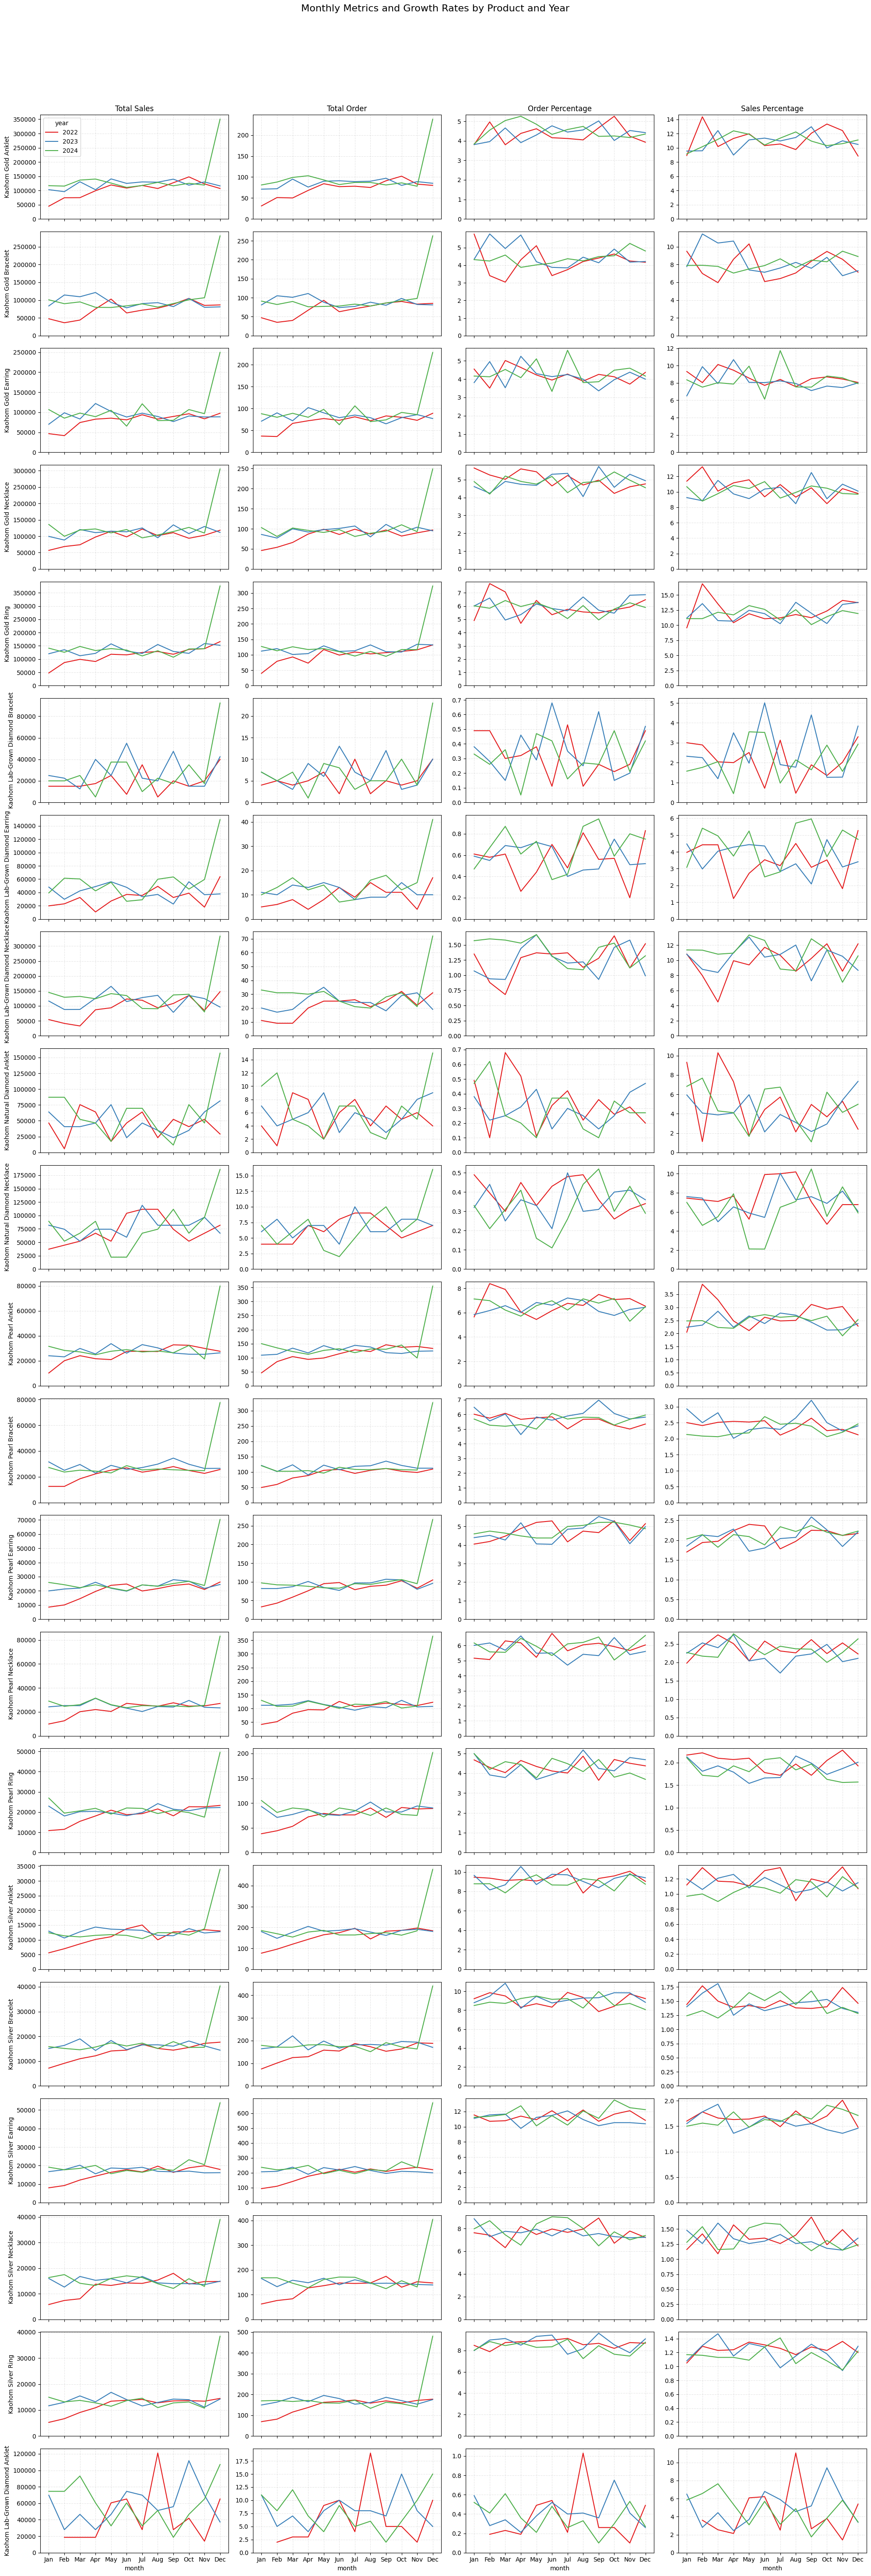

In [251]:
products = product_sales['product_name'].unique()
metrics = [
    ('total_sales', 'Total Sales'),
    ('quantity', 'Total Order'),
    ('quantity_pct', 'Order Percentage'),
    ('sales_pct', 'Sales Percentage')
]
fig, axes = plt.subplots(nrows=len(products), ncols=4, figsize=(20, 60), sharex= True)

for row_idx, product in enumerate(products):
    product_data = product_sales[product_sales['product_name'] == product]

    for col_idx, (metric, label) in enumerate(metrics):
        ax= axes[row_idx, col_idx]
        sns.lineplot(data=product_data, x='month', y=metric, hue='year', palette='Set1', ax=ax)

        if row_idx == 0:
            ax.set_title(label)
        if col_idx == 0:
            ax.set_ylabel(f'{product}')
        else:
            ax.set_ylabel('')

        ax.set_xticks(range(0, 12))
        ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.set_ylim(0)

        if not (row_idx == 0 and col_idx == 0):
            ax.get_legend().remove()


plt.suptitle('Monthly Metrics and Growth Rates by Product and Year', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("Monthly_Metrics_and_Growth_Rates_by_Product_and_Year.png", dpi=300)
plt.show()

In [252]:
material_sum = product_sales.groupby('material').agg(
    total_sales= ('total_sales', 'sum'),
    quantity= ('quantity', 'sum')
).reset_index()
material['quantity_pct'] = (material['quantity'] / material['quantity'].sum() * 100).round(2)
material['sales_pct'] = (material['total_sales'] / material['total_sales'].sum() * 100).round(2)
material

material  total_sales  quantity  quantity_pct  sales_pct
0               Gold     19923314     16740         23.83      49.51
1  Lab-Grown Diamond      8559527      1848          2.63      21.27
2    Natural Diamond      4546440       450          0.64      11.30
3              Pearl      4512973     19091         27.17      11.21
4             Silver      2698546     32124         45.73       6.71

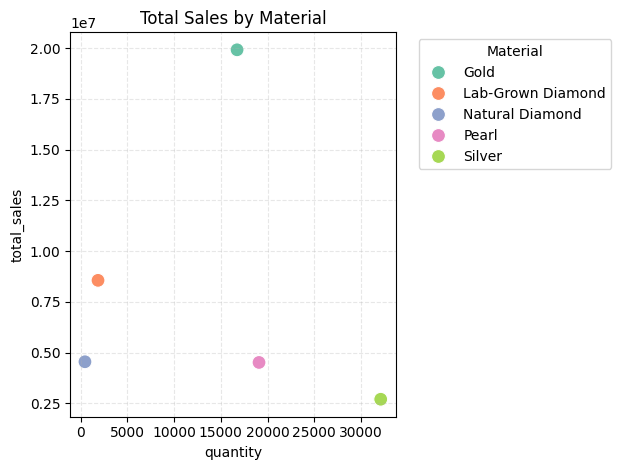

In [253]:
sns.scatterplot(data= material_sum, x='quantity', y='total_sales', hue='material', palette='Set2', s=100)
plt.title('Total Sales by Material')
plt.legend(title='Material', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("Total_Sales_by_Material.png", dpi=300)
plt.show()

##Growth Level

###Monthly Growth

create monthly metrics, including total sales, average order value (AOV), and growth rates. Understanding these monthly trends provides insights into business health over time.

In [254]:
# Aggregate monthly metrics grouped by purchase month
monthly_growth = unique_transac.groupby(['year_month', 'year', 'month']).agg(
    total_sales=('total', 'sum'),
    avg_sales=('total', 'mean'),
    total_orders=('transaction_id', 'count')
)

# Calculate the growth rate for each metric

monthly_growth['sales_growth_rate'] = monthly_growth['total_sales'].pct_change() * 100
monthly_growth['aov_growth_rate'] = monthly_growth['avg_sales'].pct_change() * 100
monthly_growth['order_growth_rate'] = monthly_growth['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
monthly_growth = monthly_growth.fillna(0).round(0).astype(int)
monthly_growth

total_sales  avg_sales  total_orders  \
year_month year month                                         
2022-01    2022 Jan         499571       1210           413   
2022-02    2022 Feb         517362       1039           498   
2022-03    2022 Mar         733699       1100           667   
2022-04    2022 Apr         874805       1139           768   
2022-05    2022 May         995850       1123           887   
2022-06    2022 Jun        1049769       1132           927   
2022-07    2022 Jul        1115161       1175           949   
2022-08    2022 Aug        1094535       1163           941   
2022-09    2022 Sep        1054239       1100           958   
2022-10    2022 Oct        1106618       1129           980   
2022-11    2022 Nov         989369       1021           969   
2022-12    2022 Dec        1209765       1199          1009   
2023-01    2023 Jan        1075907       1136           947   
2023-02    2023 Feb         998836       1100           908   
2023-03    2023 Mar        1049383       1030          1019   
2023-04    2023 Apr        1140376       1164           980   
2023-05    2023 May        1264723       1222          1035   
2023-06    2023 Jun        1096956       1139           963   
2023-07    2023 Jul        1184898       1198           989   
2023-08    2023 Aug        1125902       1140           988   
2023-09    2023 Sep        1077008       1103           976   
2023-10    2023 Oct        1186909       1171          1014   
2023-11    2023 Nov        1181109       1182           999   
2023-12    2023 Dec        1106404       1150           962   
2024-01    2024 Jan        1275848       1216          1049   
2024-02    2024 Feb        1135100       1142           994   
2024-03    2024 Mar        1217908       1245           978   
2024-04    2024 Apr        1130717       1163           972   
2024-05    2024 May        1055771       1091           968   
2024-06    2024 Jun        1064391       1117           953   
2024-07    2024 Jul        1032987       1085           952   
2024-08    2024 Aug        1048352       1119           937   
2024-09    2024 Sep        1062644       1108           959   
2024-10    2024 Oct        1213082       1199          1012   
2024-11    2024 Nov        1121740       1213           925   
2024-12    2024 Dec        3153106       1146          2751   

                       sales_growth_rate  aov_growth_rate  order_growth_rate  
year_month year month                                                         
2022-01    2022 Jan                    0                0                  0  
2022-02    2022 Feb                    4              -14                 21  
2022-03    2022 Mar                   42                6                 34  
2022-04    2022 Apr                   19                4                 15  
2022-05    2022 May                   14               -1                 15  
2022-06    2022 Jun                    5                1                  5  
2022-07    2022 Jul                    6                4                  2  
2022-08    2022 Aug                   -2               -1                 -1  
2022-09    2022 Sep                   -4               -5                  2  
2022-10    2022 Oct                    5                3                  2  
2022-11    2022 Nov                  -11              -10                 -1  
2022-12    2022 Dec                   22               17                  4  
2023-01    2023 Jan                  -11               -5                 -6  
2023-02    2023 Feb                   -7               -3                 -4  
2023-03    2023 Mar                    5               -6                 12  
2023-04    2023 Apr                    9               13                 -4  
2023-05    2023 May                   11                5                  6  
2023-06    2023 Jun                  -13               -7                 -7  
2023-07    2023 Jul                    8        

**Viz**

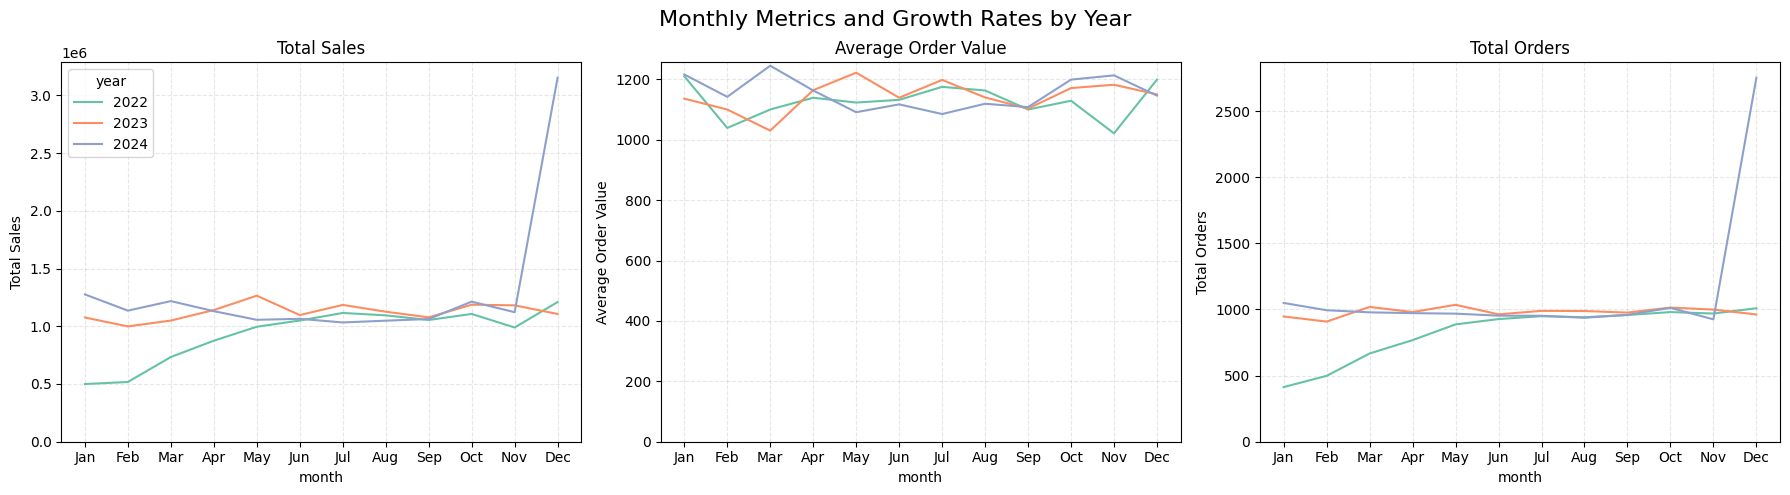

In [255]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex= True)
metrics = [
    ('total_sales', 'Total Sales'),
    ('avg_sales', 'Average Order Value'),
    ('total_orders', 'Total Orders')
]

for i, (metric, label) in enumerate(metrics):
    sns.lineplot(data=monthly_growth, x='month', y=metric, hue='year', palette='Set2', ax=axes[i], errorbar=None)
    axes[i].set_title(label)
    axes[i].set_xticks(range(0, 12))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_ylabel(label)
    axes[i].grid(True, linestyle='--', alpha=0.3)
    axes[i].set_ylim(0)
    axes[i].legend().set_title('year') if i == 0 else axes[i].legend_.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Monthly Metrics and Growth Rates by Year', fontsize=16)
plt.savefig("Monthly_Metrics_and_Growth_Rates_by_Year.png", dpi=300)
plt.show()


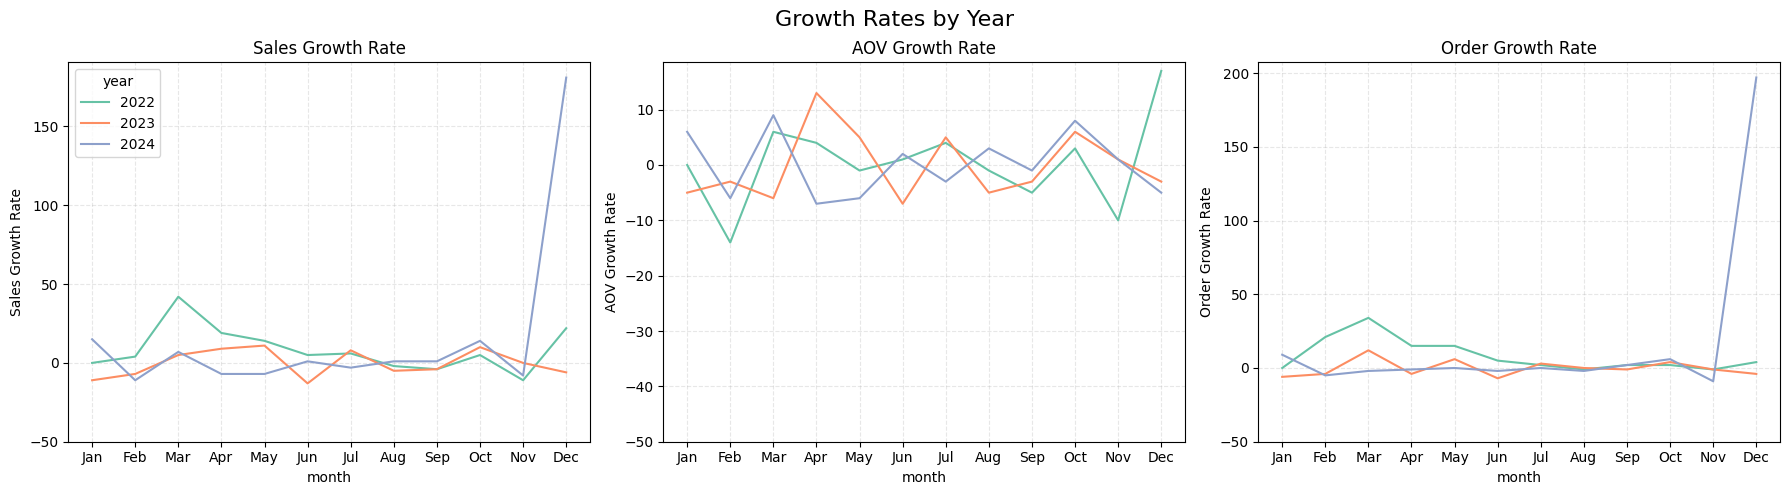

In [290]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex= True)
metrics = [
    ('sales_growth_rate', 'Sales Growth Rate'),
    ('aov_growth_rate', 'AOV Growth Rate'),
    ('order_growth_rate', 'Order Growth Rate')
]

for i, (metric, label) in enumerate(metrics):
    sns.lineplot(data=monthly_growth, x='month', y=metric, hue='year', palette='Set2', ax=axes[i], errorbar=None)
    axes[i].set_title(label)
    axes[i].set_xticks(range(0, 12))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_ylabel(label)
    axes[i].grid(True, linestyle='--', alpha=0.3)
    axes[i].set_ylim(-50)
    axes[i].legend().set_title('year') if i == 0 else axes[i].legend_.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Growth Rates by Year', fontsize=16)
plt.savefig("Growth_Rates_by_Year.png", dpi=300)
plt.show()

###Quarterly Growth

create quarterly metrics, including total sales, average order value (AOV), and growth rates. Understanding these quarterly trends provides insights into business health over time.

In [256]:
# Aggregate quarterly metrics grouped by purchase quarter
quarterly_growth = unique_transac.groupby(unique_transac['purchase_date'].dt.to_period('Q').rename('quarter')).agg(
    total_sales=('total', 'sum'),
    avg_sales=('total', 'mean'),
    total_orders=('transaction_id', 'count')
)

# Calculate the growth rate for each metric
quarterly_growth['sales_growth_rate'] = quarterly_growth['total_sales'].pct_change() * 100
quarterly_growth['aov_growth_rate'] = quarterly_growth['avg_sales'].pct_change() * 100
quarterly_growth['order_growth_rate'] = quarterly_growth['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
quarterly_growth = quarterly_growth.fillna(0).round(0).astype(int)
quarterly_growth

total_sales  avg_sales  total_orders  sales_growth_rate  \
quarter                                                            
2022Q1       1750632       1109          1578                  0   
2022Q2       2920424       1131          2582                 67   
2022Q3       3263935       1146          2848                 12   
2022Q4       3305752       1118          2958                  1   
2023Q1       3124126       1087          2874                 -5   
2023Q2       3502055       1176          2978                 12   
2023Q3       3387808       1147          2953                 -3   
2023Q4       3474422       1168          2975                  3   
2024Q1       3628856       1201          3021                  4   
2024Q2       3250879       1124          2893                -10   
2024Q3       3143983       1104          2848                 -3   
2024Q4       5487928       1171          4688                 75   

         aov_growth_rate  order_growth_rate  
quarter                                      
2022Q1                 0                  0  
2022Q2                 2                 64  
2022Q3                 1                 10  
2022Q4                -2                  4  
2023Q1                -3                 -3  
2023Q2                 8                  4  
2023Q3                -2                 -1  
2023Q4                 2                  1  
2024Q1                 3                  2  
2024Q2                -6                 -4  
2024Q3                -2                 -2  
2024Q4                 6                 65

###Yearly Growth

create yearly metrics, including total sales, average order value (AOV), and growth rates. Understanding these yearly trends provides insights into business health over time.

In [257]:
# Aggregate yearly metrics grouped by purchase year
yearly_growth = unique_transac.groupby(unique_transac['purchase_date'].dt.to_period('Y').rename('year')).agg(
    total_sales=('total', 'sum'),
    avg_sales=('total', 'mean'),
    total_orders=('transaction_id', 'count')
)

# Calculate the growth rate for each metric
yearly_growth['sales_growth_rate'] = yearly_growth['total_sales'].pct_change() * 100
yearly_growth['aov_growth_rate'] = yearly_growth['avg_sales'].pct_change() * 100
yearly_growth['order_growth_rate'] = yearly_growth['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
yearly_growth = yearly_growth.fillna(0).round(0).astype(int)
yearly_growth

total_sales  avg_sales  total_orders  sales_growth_rate  \
year                                                            
2022     11240743       1128          9966                  0   
2023     13488411       1145         11780                 20   
2024     15511646       1153         13450                 15   

      aov_growth_rate  order_growth_rate  
year                                      
2022                0                  0  
2023                2                 18  
2024                1                 14

assume that every product have the same gross margin at 50%

##Investment Efficiency Level

Business efficiency reflects the overall financial health of the business, typically measured through net profit after accounting for all costs and revenue streams.

**Monthly Net Profit**

In [258]:
# Aggregate total sales grouped by month
monthly_net_profit = unique_transac.groupby(['year_month', 'year', 'month']).agg(
    total_sales=('total', 'sum')
).reset_index().rename(columns=({'month': 'month_str', 'year_month': 'month'}))
# Merge total spend
monthly_net_profit = monthly_net_profit.merge(total_spend[['total_spend', 'month']], on='month', how='left')

#Calculate Net Profit
monthly_net_profit['net_profit'] = monthly_net_profit['total_sales'] - monthly_net_profit['total_spend']

# Calculate the growth rate for each metric
monthly_net_profit['net_profit_rate'] = monthly_net_profit['net_profit'].pct_change() * 100

monthly_net_profit = monthly_net_profit.fillna(0).round(0)
monthly_net_profit['net_profit_rate'] = monthly_net_profit['net_profit_rate'].astype(int)
monthly_net_profit

month  year month_str  total_sales  total_spend  net_profit  \
0   2022-01  2022       Jan       499571     292286.0    207286.0   
1   2022-02  2022       Feb       517362     298190.0    219172.0   
2   2022-03  2022       Mar       733699     404178.0    329520.0   
3   2022-04  2022       Apr       874805     481662.0    393142.0   
4   2022-05  2022       May       995850     538938.0    456912.0   
5   2022-06  2022       Jun      1049769     559034.0    490736.0   
6   2022-07  2022       Jul      1115161     596028.0    519132.0   
7   2022-08  2022       Aug      1094535     588202.0    506334.0   
8   2022-09  2022       Sep      1054239     564026.0    490214.0   
9   2022-10  2022       Oct      1106618     593790.0    512828.0   
10  2022-11  2022       Nov       989369     529846.0    459524.0   
11  2022-12  2022       Dec      1209765     643980.0    565784.0   
12  2023-01  2023       Jan      1075907     581038.0    494868.0   
13  2023-02  2023       Feb       998836     538653.0    460183.0   
14  2023-03  2023       Mar      1049383     570250.0    479132.0   
15  2023-04  2023       Apr      1140376     611674.0    528702.0   
16  2023-05  2023       May      1264723     672740.0    591984.0   
17  2023-06  2023       Jun      1096956     586756.0    510200.0   
18  2023-07  2023       Jul      1184898     633537.0    551361.0   
19  2023-08  2023       Aug      1125902     603289.0    522613.0   
20  2023-09  2023       Sep      1077008     577641.0    499367.0   
21  2023-10  2023       Oct      1186909     631026.0    555884.0   
22  2023-11  2023       Nov      1181109     635954.0    545156.0   
23  2023-12  2023       Dec      1106404     598308.0    508096.0   
24  2024-01  2024       Jan      1275848     681021.0    594827.0   
25  2024-02  2024       Feb      1135100     607724.0    527376.0   
26  2024-03  2024       Mar      1217908     649916.0    567992.0   
27  2024-04  2024       Apr      1130717     610242.0    520474.0   
28  2024-05  2024       May      1055771     565662.0    490108.0   
29  2024-06  2024       Jun      1064391     573276.0    491114.0   
30  2024-07  2024       Jul      1032987     554836.0    478150.0   
31  2024-08  2024       Aug      1048352     563852.0    484500.0   
32  2024-09  2024       Sep      1062644     568488.0    494156.0   
33  2024-10  2024       Oct      1213082     644522.0    568560.0   
34  2024-11  2024       Nov      1121740     597803.0    523937.0   
35  2024-12  2024       Dec      3153106    1618442.0   1534664.0   

    net_profit_rate  
0                 0  
1                 6  
2                50  
3                19  
4                16  
5                 7  
6                 6  
7                -2  
8                -3  
9                 5  
10              -10  
11               23  
12              -13  
13               -7  
14                4  
15               10  
16               12  
17              -14  
18                8  
19               -5  
20               -4  
21               11  
22               -2  
23               -7  
24               17  
25              -11  
26                8  
27               -8  
28               -6  
29                0  
30               -3  
31                1  
32                2  
33               15  
34               -8  
35              193

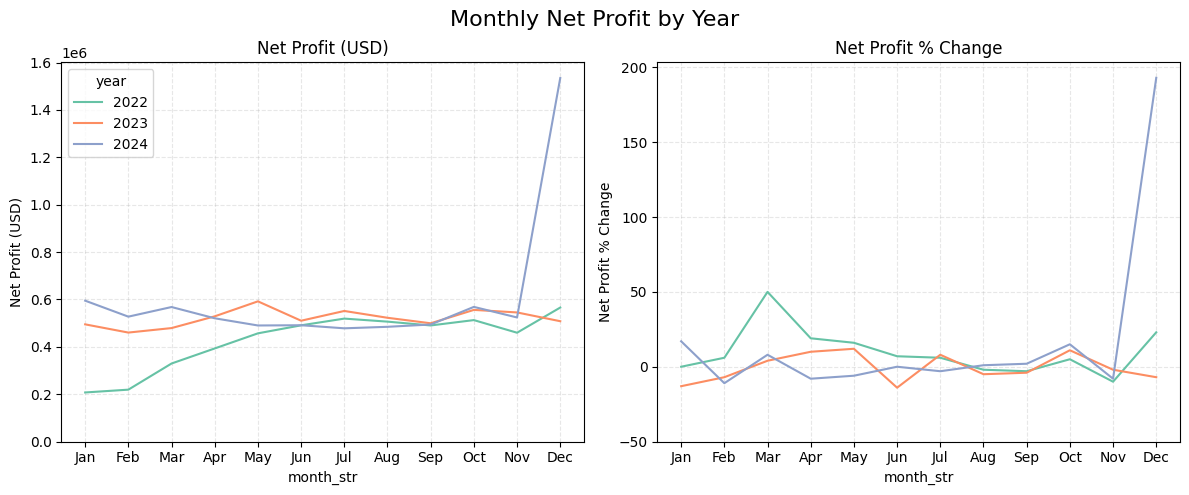

In [259]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex= True)
metrics = [
    ('net_profit', 'Net Profit (USD)'),
    ('net_profit_rate', 'Net Profit % Change')
]

for i, (metric, label) in enumerate(metrics):
    sns.lineplot(data=monthly_net_profit, x='month_str', y=metric, hue='year', palette='Set2', ax=axes[i])
    axes[i].set_title(label)
    axes[i].set_xticks(range(0, 12))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_ylabel(label)
    axes[i].grid(True, linestyle='--', alpha=0.3)
    axes[i].set_ylim(-50)
    axes[i].legend().set_title('year') if i == 0 else axes[i].legend_.remove()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle('Monthly Net Profit by Year', fontsize=16)
plt.savefig("Monthly_Net_Profit_by_Year.png", dpi=300)
plt.show()

**Quarterly Net Profit**

In [260]:
# Aggregate total sales grouped by quarter
quarterly_net_profit = unique_transac.groupby(unique_transac['purchase_date'].dt.to_period('Q').astype(str).rename('quarter')).agg(
    total_sales=('total', 'sum')
)
# Change Period total spend
total_spend['quarter'] = pd.to_datetime(total_spend['month']).dt.to_period('Q').astype(str)
quarterly_spend = total_spend.groupby('quarter')[['total_spend']].sum().reset_index()

# Merge together
quarterly_net_profit = quarterly_net_profit.merge(quarterly_spend[['quarter', 'total_spend']], on='quarter', how='left')

#Calculate Net Profit
quarterly_net_profit['net_profit'] = quarterly_net_profit['total_sales'] - quarterly_net_profit['total_spend']

# Calculate the growth rate for each metric
quarterly_net_profit['net_profit_rate'] = quarterly_net_profit['net_profit'].pct_change() * 100

quarterly_net_profit = quarterly_net_profit.fillna(0).round(0)
quarterly_net_profit['net_profit_rate'] = quarterly_net_profit['net_profit_rate'].astype(int)
quarterly_net_profit

quarter  total_sales  total_spend  net_profit  net_profit_rate
0   2022Q1      1750632     994654.0    755978.0                0
1   2022Q2      2920424    1579634.0   1340790.0               77
2   2022Q3      3263935    1748256.0   1515680.0               13
3   2022Q4      3305752    1767616.0   1538136.0                1
4   2023Q1      3124126    1689942.0   1434184.0               -7
5   2023Q2      3502055    1871170.0   1630886.0               14
6   2023Q3      3387808    1814467.0   1573341.0               -4
7   2023Q4      3474422    1865287.0   1609135.0                2
8   2024Q1      3628856    1938661.0   1690195.0                5
9   2024Q2      3250879    1749182.0   1501698.0              -11
10  2024Q3      3143983    1687176.0   1456806.0               -3
11  2024Q4      5487928    2860767.0   2627161.0               80

**Yearly Net Profit**

In [261]:
# Aggregate total sales grouped by year
yearly_net_profit = unique_transac.groupby(unique_transac['purchase_date'].dt.to_period('Y').astype(str).rename('year')).agg(
    total_sales=('total', 'sum')
)
# Change Period total spend
total_spend['year'] = pd.to_datetime(total_spend['month']).dt.to_period('Y').astype(str)
yearly_spend = total_spend.groupby('year')[['total_spend']].sum().reset_index()

# Merge together
yearly_net_profit = yearly_net_profit.merge(yearly_spend[['year', 'total_spend']], on='year', how='left')

#Calculate Net Profit
yearly_net_profit['net_profit'] = yearly_net_profit['total_sales'] - yearly_net_profit['total_spend']

# Calculate the growth rate for each metric
yearly_net_profit['net_profit_rate'] = yearly_net_profit['net_profit'].pct_change() * 100

yearly_net_profit = yearly_net_profit.fillna(0).round(0)
yearly_net_profit['net_profit_rate'] = yearly_net_profit['net_profit_rate'].astype(int)
yearly_net_profit

year  total_sales  total_spend  net_profit  net_profit_rate
0  2022     11240743    6090160.0   5150584.0                0
1  2023     13488411    7240866.0   6247546.0               21
2  2024     15511646    8235786.0   7275860.0               16

##Email Funnel Analysis

Email funnel analysis is treated as a standalone insight focused solely on measuring conversion rates from email campaigns. Since it requires minimal resources and doesn’t directly impact other insights, we analyze it independently.

In [262]:
email_funnel_df = pd.read_csv('email_funnel.csv')
email_funnel_df

month  emails_sent  opens  clicks  add_to_carts  purchases
0    2022-01-01            8      2       0             0          0
1    2022-01-01            8      3       0             0          0
2    2022-01-01            8      3       0             0          0
3    2022-01-01            8      2       0             0          0
4    2022-02-01          214     73      19             3          0
..          ...          ...    ...     ...           ...        ...
108  2024-11-01         7266   2688     655            99         22
109  2024-11-01         7266   2512     723           175         43
110  2024-12-01         7466   2596     586           125         30
111  2024-12-01         7466   3369     471           110         25
112  2024-12-01         7466   2744     794           157         34

[113 rows x 6 columns]

**Change to Monthly period**

In [293]:
email_funnel_df['month'] = pd.to_datetime(email_funnel_df['month']).dt.to_period('M').astype(str)
email_funnel_df['month_str'] = pd.to_datetime(email_funnel_df['month']).dt.month_name().str[:3]
email_funnel_df['month_num'] = pd.to_datetime(email_funnel_df['month']).dt.month
email_funnel_df['year'] = pd.to_datetime(email_funnel_df['month']).dt.year

email_funnel_df = email_funnel_df.groupby('month').sum()

**Check drop-off and conversion**

In [294]:
email_funnel_df['open_rate'] = email_funnel_df['opens'] / email_funnel_df['emails_sent']
email_funnel_df['click_rate'] = email_funnel_df['clicks'] / email_funnel_df['opens']
email_funnel_df['add_to_carts_rate'] = email_funnel_df['add_to_carts'] / email_funnel_df['clicks']
email_funnel_df['purchases_rate'] = email_funnel_df['purchases'] / email_funnel_df['add_to_carts']
email_funnel_df['conversion_rate'] = email_funnel_df['purchases'] / email_funnel_df['emails_sent']
email_funnel_df = email_funnel_df.round(3).reset_index()
email_funnel_df.head()

month  emails_sent  opens  clicks  add_to_carts  purchases  open_rate  \
0  2022-01           32     10       0             0          0      0.312   
1  2022-02          642    259      55            11          0      0.403   
2  2022-03          392    181      42             8          1      0.462   
3  2022-04         2532    903     138            27          4      0.357   
4  2022-05          855    307      35             7          1      0.359   

   click_rate  add_to_carts_rate  purchases_rate  conversion_rate month_str  \
0       0.000                NaN             NaN            0.000       Jan   
1       0.212              0.200           0.000            0.000       Feb   
2       0.232              0.190           0.125            0.003       Mar   
3       0.153              0.196           0.148            0.002       Apr   
4       0.114              0.200           0.143            0.001       May   

   year  month_num  
0  2022          1  
1  2022          2  
2  2022          3  
3  2022          4  
4  2022          5

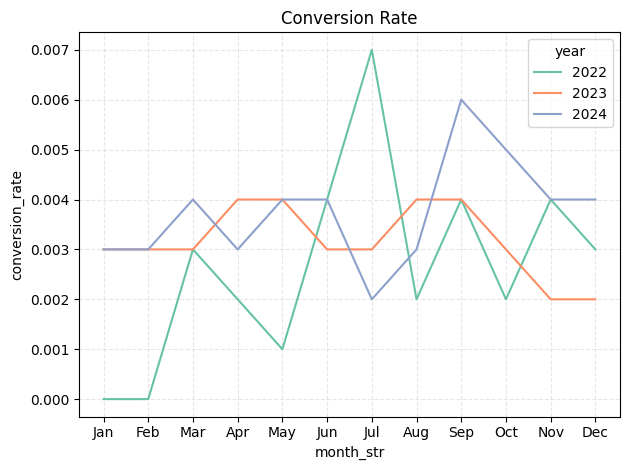

In [295]:
sns.lineplot(data= email_funnel_df, x='month_str', y='conversion_rate', hue='year', palette='Set2')
plt.title('Conversion Rate')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("Conversion_Rate.png", dpi=300)
plt.show()

In [296]:
email_funnel_df['conversion_rate'].mean()

np.float64(0.003194444444444445)

#Conclusion

In conclusion, I’ve provided decision-making takeaways based on insights from each module. You can explore them in detail here: [link]


**project owner : somsanouk siliphokha**